# INTRODUCTION

I have two problems. One of them is how many tickest will be sold and the other is finding optimal ticket prices.

First of all, i have to write my process.

I follow five instruction for solving any data science problem:

    - Define the problem

    - Prepare Data / Data Preprocessing
        Get Data
        Data Cleaning/Wrangling
        Statistical Analysis
        Data Visualization
        Feature Selection/Scaling
        Data Transformation

    - Check Algorithms
        Train & Test Data
        Apply ML Algorithm
        Test
        Perform Measure
        Evaulate accuarcy of different algorithm

    - Improve Results
        Algorithm Tuning

    - Present Results
        Conclusion
        Presentation

# 1-HOW MANY TICKETS WILL BE SOLD?

## 1.1-Define the Problem

There are  number of tickets sold for two years.

We want to predict number of tickets sold for next two months.

There are given two datasets and i am planning to work one of them for applying ML algorithm.

I am going to use this model for estimating number of tickets sold in different categories. In addition to that inputs of model are in the train_data.

This case seems like time series analysis.

Important points are in below for the results:
    
    -use holidays library
    -use MAE for accurarcy
    -use Python with jupyter notebook that have to include solution, code and thoughts

So let's start data analysis...

## 1.2 Data Preprocessing

In [1]:
# Import essential library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set()

In [2]:
# Log
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='flixbus.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

In [3]:
# Get data
file = 'training_data.csv'
data = pd.read_csv(file)
# data = pd.read_csv(file, index_col=0)

data.head(5)
data.shape

index       ride_departure  capacity  tickets_9_eur  tickets_12_eur  \
0      0  2015-01-01 08:15:00      82.0           21.0             0.0   
1      1  2015-01-01 09:15:00      82.0           12.0             0.0   
2      2  2015-01-01 10:15:00      82.0           33.0             0.0   
3      3  2015-01-01 11:45:00      82.0           25.0             0.0   
4      4  2015-01-01 12:45:00      82.0           32.0             0.0   

   tickets_15_eur  tickets_19_eur direction  
0             0.0             0.0      B->A  
1             0.0             0.0      A->B  
2             0.0             0.0      B->A  
3             0.0             0.0      A->B  
4             0.0             0.0      B->A

(19319, 8)

In [4]:
# Data types and size
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19319 entries, 0 to 19318
Data columns (total 8 columns):
index             19319 non-null int64
ride_departure    19319 non-null object
capacity          19319 non-null float64
tickets_9_eur     19319 non-null float64
tickets_12_eur    19319 non-null float64
tickets_15_eur    19309 non-null float64
tickets_19_eur    19309 non-null float64
direction         19319 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 1.2+ MB


###### about data:

    -ride_departure is object, it is normal because of timestamp 
    -the other columns is float
    -direction is object, it is normal beucause of direction information
    -there are null values

###### todo list for the model:

    -parse the ride_departure such as minute, hour, day ..
    -convert to direction value as numeric value like 1 or 0
    -fill null values
    -check capacity
    -check negative values
    

In [5]:
# split the timestamp
data.ride_departure = pd.to_datetime(data.ride_departure)
data['year'] = data.ride_departure.dt.year
data['month'] = data.ride_departure.dt.month
data['week'] = data.ride_departure.dt.week
data['day'] = data.ride_departure.dt.day
data['hour'] = data.ride_departure.dt.hour
data['minute'] = data.ride_departure.dt.minute

data.head(5)

index      ride_departure  capacity  tickets_9_eur  tickets_12_eur  \
0      0 2015-01-01 08:15:00      82.0           21.0             0.0   
1      1 2015-01-01 09:15:00      82.0           12.0             0.0   
2      2 2015-01-01 10:15:00      82.0           33.0             0.0   
3      3 2015-01-01 11:45:00      82.0           25.0             0.0   
4      4 2015-01-01 12:45:00      82.0           32.0             0.0   

   tickets_15_eur  tickets_19_eur direction  year  month  week  day  hour  \
0             0.0             0.0      B->A  2015      1     1    1     8   
1             0.0             0.0      A->B  2015      1     1    1     9   
2             0.0             0.0      B->A  2015      1     1    1    10   
3             0.0             0.0      A->B  2015      1     1    1    11   
4             0.0             0.0      B->A  2015      1     1    1    12   

   minute  
0      15  
1      15  
2      15  
3      45  
4      45

In [6]:
# direction encoder
# convert to direction value as numeric value like 1 or 0
# 1: from A to B
# 0: from B to A

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
encoder = LabelEncoder()
data.loc[:, 'direction'] = encoder.fit_transform(data.loc[:,'direction'])

# ==> second option, but you have to be sure that there are two direction just
# data.direction = np.where(data.direction == 'A->B', 1, 0)

data.head(5)

index      ride_departure  capacity  tickets_9_eur  tickets_12_eur  \
0      0 2015-01-01 08:15:00      82.0           21.0             0.0   
1      1 2015-01-01 09:15:00      82.0           12.0             0.0   
2      2 2015-01-01 10:15:00      82.0           33.0             0.0   
3      3 2015-01-01 11:45:00      82.0           25.0             0.0   
4      4 2015-01-01 12:45:00      82.0           32.0             0.0   

   tickets_15_eur  tickets_19_eur  direction  year  month  week  day  hour  \
0             0.0             0.0          1  2015      1     1    1     8   
1             0.0             0.0          0  2015      1     1    1     9   
2             0.0             0.0          1  2015      1     1    1    10   
3             0.0             0.0          0  2015      1     1    1    11   
4             0.0             0.0          1  2015      1     1    1    12   

   minute  
0      15  
1      15  
2      15  
3      45  
4      45

In [7]:
# group by direction
data.groupby(['direction']).agg({'direction':'count'})
data.groupby(['direction', 'year']).agg({'direction':'count'})

# everything is fine, count of ride is similarly
# it shows regularly departure and return

# you can try in below code for the detail
# data.groupby(['direction', 'year', 'month']).agg({'index':'count'})
# data.groupby(['direction', 'year', 'month', 'week']).agg({'index':'count'})
# data.groupby(['direction', 'year', 'month', 'week', 'day']).agg({'index':'count'})

direction
direction           
0               9660
1               9659

direction
direction year           
0         2015       3465
          2016       4617
          2017       1578
1         2015       3466
          2016       4617
          2017       1576

In [8]:
# update negative values with zero
data['tickets_9_eur']  = np.where((data['tickets_9_eur']  < 0), 0, data['tickets_9_eur'])
data['tickets_12_eur'] = np.where((data['tickets_12_eur'] < 0), 0, data['tickets_12_eur'])
data['tickets_15_eur'] = np.where((data['tickets_15_eur'] < 0), 0, data['tickets_15_eur'])
data['tickets_19_eur'] = np.where((data['tickets_19_eur'] < 0), 0, data['tickets_19_eur'])

In [9]:
# add holiday column
import holidays

# de_holidays = holidays.Germany()
de_holidays = holidays.DE(state='BY')

data["holiday"] = np.where(data.apply(lambda x: x.ride_departure in de_holidays, axis=1) == True, 1, 0)

data[(data.holiday == 1)].head(5)

index      ride_departure  capacity  tickets_9_eur  tickets_12_eur  \
0      0 2015-01-01 08:15:00      82.0           21.0             0.0   
1      1 2015-01-01 09:15:00      82.0           12.0             0.0   
2      2 2015-01-01 10:15:00      82.0           33.0             0.0   
3      3 2015-01-01 11:45:00      82.0           25.0             0.0   
4      4 2015-01-01 12:45:00      82.0           32.0             0.0   

   tickets_15_eur  tickets_19_eur  direction  year  month  week  day  hour  \
0             0.0             0.0          1  2015      1     1    1     8   
1             0.0             0.0          0  2015      1     1    1     9   
2             0.0             0.0          1  2015      1     1    1    10   
3             0.0             0.0          0  2015      1     1    1    11   
4             0.0             0.0          1  2015      1     1    1    12   

   minute  holiday  
0      15        1  
1      15        1  
2      15        1  
3      45        1  
4      45        1

In [10]:
# check capacity, null values and incorrect records
def get_the_incorrect_records():
    
    # check null values
    check_null_columns = data.isnull().sum()
    print('**************************')
    print('Check Null Values Column by Column')
    print(check_null_columns)
    print('**************************')
        
    # check capacity
    data['total_ticket'] = data.tickets_9_eur + data.tickets_12_eur + data.tickets_15_eur + data.tickets_19_eur
    data['capacity_check'] = np.where((data['total_ticket'] > data['capacity']), 1, 0)
    
    # result
    print('count of capacity error                        : ', np.sum(data.capacity_check == 1))
    print('count of tickets_12_eur error records with 999 : ', np.sum(data.tickets_12_eur == 999))
    print('count of null values                           : ', data.isnull().values.sum())

In [11]:
get_the_incorrect_records()

**************************
Check Null Values Column by Column
index              0
ride_departure     0
capacity           0
tickets_9_eur      0
tickets_12_eur     0
tickets_15_eur    10
tickets_19_eur    10
direction          0
year               0
month              0
week               0
day                0
hour               0
minute             0
holiday            0
dtype: int64
**************************
count of capacity error                        :  118
count of tickets_12_eur error records with 999 :  10
count of null values                           :  40



- We should deal with unexpected values and null values for the finish data preprocessing!!!

- We can profit by the graphics for this.


- I should replace some unexpected value with daily mean in this week and year.

In [12]:
# replace 999 with mean for tickets_12_eur
week_year_tickets = data[(data.tickets_12_eur == 999)][['day', 'week', 'year']].drop_duplicates()
data_tickets_12 = data.merge(week_year_tickets, on=['day','week', 'year'], how='inner', indicator=True)

data_tickets_12 = data_tickets_12[data_tickets_12.tickets_12_eur != 999].groupby(['year', 'week', 'day']).agg({'tickets_12_eur':sum, 'index':'count'})
data_tickets_12['mean'] = round(data_tickets_12['tickets_12_eur'] / data_tickets_12['index'])

data = data.merge(data_tickets_12[['mean']], on=['day','week', 'year'], how='left', indicator=True)
data.loc[data['tickets_12_eur'] == 999, 'tickets_12_eur'] = data['mean']

In [13]:
# replace null values with mean for tickets_15_eur
data = data.drop(columns=['_merge'], axis=1)
week_year_15 = data[(data['tickets_15_eur'].isnull())][['day', 'week', 'year']].drop_duplicates()

data_null_15 = data.merge(week_year_15, on=['day','week', 'year'], how='inner', indicator=True)

data_null_15 = data_null_15[~data_null_15.tickets_15_eur.isnull()].groupby(['year', 'week', 'day']).agg({'tickets_15_eur':sum, 'index':'count'})
data_null_15['mean_15'] = round(data_null_15['tickets_15_eur'] / data_null_15['index'])

data = data.merge(data_null_15[['mean_15']], on=['day','week', 'year'], how='left', indicator=True)
data.loc[data['tickets_15_eur'].isnull(), 'tickets_15_eur'] = data['mean_15']

In [14]:
# replace null values with mean for tickets_19_eur
data = data.drop(columns=['_merge'], axis=1)
week_year_19 = data[(data['tickets_19_eur'].isnull())][['day', 'week', 'year']].drop_duplicates()

data_null_19 = data.merge(week_year_19, on=['day','week', 'year'], how='inner', indicator=True)

data_null_19 = data_null_19[~data_null_19.tickets_19_eur.isnull()].groupby(['year', 'week', 'day']).agg({'tickets_19_eur':sum, 'index':'count'})
data_null_19['mean_19'] = round(data_null_19['tickets_19_eur'] / data_null_19['index'])

data = data.merge(data_null_19[['mean_19']], on=['day','week', 'year'], how='left', indicator=True)
data.loc[data['tickets_19_eur'].isnull(), 'tickets_19_eur'] = data['mean_19']

In [15]:
# drop unnecessary columns
data = data.drop(columns=['mean', 'mean_15', 'mean_19', '_merge'])

In [16]:
# check the result again
get_the_incorrect_records()

**************************
Check Null Values Column by Column
index              0
ride_departure     0
capacity           0
tickets_9_eur      0
tickets_12_eur     0
tickets_15_eur     0
tickets_19_eur     0
direction          0
year               0
month              0
week               0
day                0
hour               0
minute             0
holiday            0
total_ticket      20
capacity_check     0
dtype: int64
**************************
count of capacity error                        :  109
count of tickets_12_eur error records with 999 :  0
count of null values                           :  0


In [17]:
# fill the capacity error
import random
columns = ['tickets_9_eur', 'tickets_12_eur', 'tickets_15_eur', 'tickets_19_eur']
rows = data[(data.capacity_check == 1)].index
for row in rows:
    column = random.choice(columns)
    while data.loc[row,column] < (data.loc[row,'total_ticket'] - data.loc[row,'capacity']):
        column = random.choice(columns)
    data.loc[row,column] = data.loc[row,column] - (data.loc[row,'total_ticket'] - data.loc[row,'capacity'])

In [18]:
# check the result again
get_the_incorrect_records()

**************************
Check Null Values Column by Column
index             0
ride_departure    0
capacity          0
tickets_9_eur     0
tickets_12_eur    0
tickets_15_eur    0
tickets_19_eur    0
direction         0
year              0
month             0
week              0
day               0
hour              0
minute            0
holiday           0
total_ticket      0
capacity_check    0
dtype: int64
**************************
count of capacity error                        :  0
count of tickets_12_eur error records with 999 :  0
count of null values                           :  0


In [19]:
# distinct some columns for checking values
data = data.drop(columns=['capacity_check'], axis=1)
data.capacity.unique()
data.direction.unique()
data.year.unique()
data.month.unique()
data.week.unique()
data.day.unique()
data.hour.unique()
data.minute.unique()
data.holiday.unique()

array([ 82.,  63.,  86., 165., 145.,  64., 168.,  54., 136.,  90.,  91.,
        65.])

array([1, 0], dtype=int64)

array([2015, 2016, 2017], dtype=int64)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

array([ 8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,  7, 14,  5,  6, 21,
       23, 22,  0,  1,  2,  3], dtype=int64)

array([15, 45, 10, 55,  0, 30, 25, 20, 35], dtype=int64)

array([1, 0], dtype=int64)

In [20]:
# some statistic information
data.describe()

index      capacity  tickets_9_eur  tickets_12_eur  \
count  19319.000000  19319.000000   19319.000000    19319.000000   
mean    9611.280139     82.240178       9.343548       23.759667   
std     5533.903630      6.063096      12.611221       14.366437   
min        0.000000     54.000000       0.000000        0.000000   
25%     4829.500000     82.000000       1.000000       12.000000   
50%     9659.000000     82.000000       4.000000       26.000000   
75%    14388.500000     82.000000      12.000000       35.000000   
max    19218.000000    168.000000      79.000000      121.000000   

       tickets_15_eur  tickets_19_eur     direction          year  \
count    19319.000000    19319.000000  19319.000000  19319.000000   
mean        11.113308        2.969305      0.499974   2015.804493   
std         14.196390        7.908607      0.500013      0.695577   
min          0.000000        0.000000      0.000000   2015.000000   
25%          0.000000        0.000000      0.000000   2015.000000   
50%          4.000000        0.000000      0.000000   2016.000000   
75%         20.000000        1.000000      1.000000   2016.000000   
max        123.000000       87.000000      1.000000   2017.000000   

              month          week           day          hour        minute  \
count  19319.000000  19319.000000  19319.000000  19319.000000  19319.000000   
mean       6.118640     25.026451     15.708888     13.844609     28.583519   
std        3.507554     15.384575      8.790544      5.026534     15.129908   
min        1.000000      1.000000      1.000000      0.000000      0.000000   
25%        3.000000     12.000000      8.000000     10.000000     15.000000   
50%        6.000000     23.000000     16.000000     14.000000     15.000000   
75%        9.000000     39.000000     23.000000     18.000000     45.000000   
max       12.000000     53.000000     31.000000     23.000000     55.000000   

            holiday  total_ticket  
count  19319.000000  19319.000000  
mean       0.026865     47.185827  
std        0.161692     17.331836  
min        0.000000      2.000000  
25%        0.000000     35.000000  
50%        0.000000     47.000000  
75%        0.000000     59.000000  
max        1.000000    159.000000

In [21]:
# analysis using the visualization technique
def plot_x_y(x, xlabel, y, ylabel, which):
    if which == 'timestamp':
        fig = plt.figure(figsize=(10, 5))
        _=plt.plot(data.ride_departure, y)
        _=plt.xlabel('Timestamp')
        _=plt.ylabel(ylabel)
        _=plt.title(ylabel + ' / Timestamp')
        plt.show();

        #_=plt.subplot(231)
        fig = plt.figure(figsize=(10, 5))
        _=plt.scatter(data.minute, y)
        _=plt.xlabel('Minute')
        _=plt.ylabel(ylabel)
        _=plt.title(ylabel + ' / Minute')
        plt.show();

        #_=plt.subplot(232)
        fig = plt.figure(figsize=(10, 5))
        _=plt.scatter(data.hour, y)
        _=plt.xlabel('Hour')
        _=plt.ylabel(ylabel)
        _=plt.title(ylabel + ' / Hour')
        plt.show();

        #_=plt.subplot(233)
        fig = plt.figure(figsize=(10, 5))
        _=plt.scatter(data.day, y)
        _=plt.xlabel('Day')
        _=plt.ylabel(ylabel)
        _=plt.title(ylabel + ' / Day')
        plt.show();

        #_=plt.subplot(234)
        fig = plt.figure(figsize=(10, 5))
        _=plt.scatter(data.week, y)
        _=plt.xlabel('Week')
        _=plt.ylabel(ylabel)
        _=plt.title(ylabel + ' / Week')
        plt.show();

        #_=plt.subplot(235)
        fig = plt.figure(figsize=(10, 5))
        _=plt.scatter(data.month, y)
        _=plt.xlabel('Month')
        _=plt.ylabel(ylabel)
        _=plt.title(ylabel + ' / Month')
        plt.show();

        #_=plt.subplot(236)
        fig = plt.figure(figsize=(10, 5))
        _=plt.scatter(data.year, y)
        _=plt.xlabel('Year')
        _=plt.ylabel(ylabel)
        _=plt.title(ylabel + ' / Year')
        plt.show();
    
    elif which == 'correlation':
        fig = plt.figure(figsize=(10, 5))
        _=plt.scatter(x, y)
        _=plt.xlabel(xlabel)
        _=plt.ylabel(ylabel)
        _=plt.title(xlabel + ' / ' + ylabel)
        plt.show();
    
    elif which == 'holiday_affect':
        plt.figure(figsize=(15,5))
        _=plt.plot(data[(data.holiday == 1)]['week'], data[(data.holiday == 1)][ylabel], 'bo', label='holiday') 
        _=plt.plot(data[(data.holiday == 0)]['week'], data[(data.holiday == 0)][ylabel], 'g', label='workday')
        _=plt.xlabel('week')
        _=plt.ylabel(ylabel)
        _=plt.title(ylabel + ' / ' + ' holiday')
        _=plt.legend(loc='best')
        plt.show();

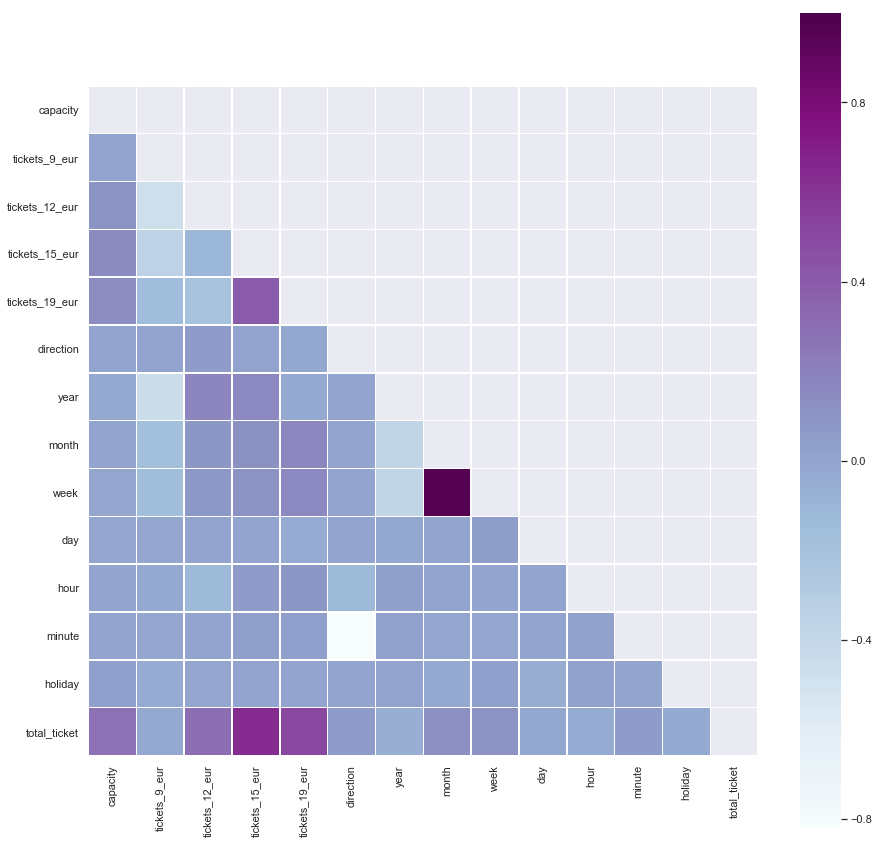

In [22]:
# i want to know correlation between all columns
corr_all = data[['ride_departure', 'capacity', 'tickets_9_eur', 'tickets_12_eur', 'tickets_15_eur', 'tickets_19_eur', 'direction', 'year', 'month', 'week', 'day', 'hour', 'minute', 'holiday', 'total_ticket']].corr()

mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (15, 15))
_=sns.heatmap(corr_all, mask = mask, square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show();

- There is a strong positive relationship between tickets_15_eur and total sold tickets
- There is a strong negative relationship between tickets_9_eur and year
- There is a strong negative relationship between tickets_9_eur and tickets_12_eur and tickets_15_eur
- There is a relationship between tickets_15_eur and tickets_19_eur (that is greater than %50), i think it is about late booking

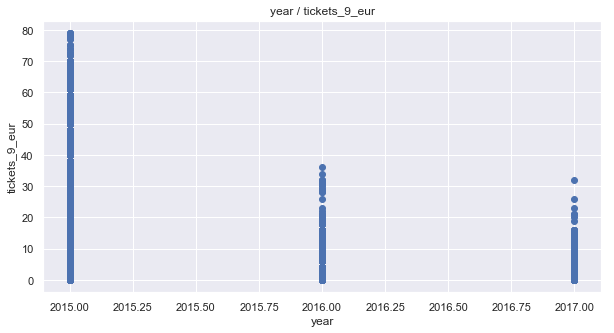

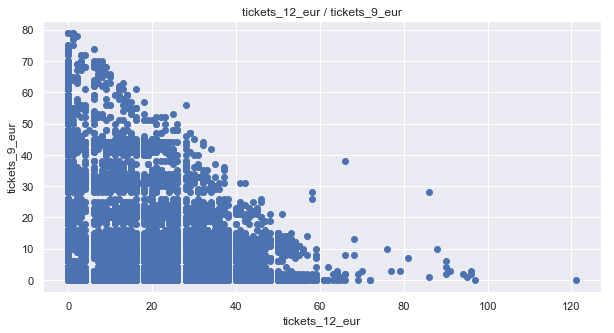

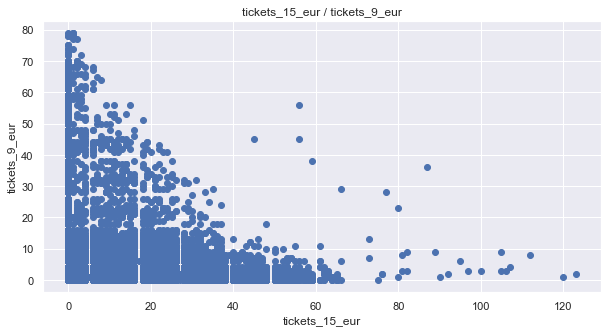

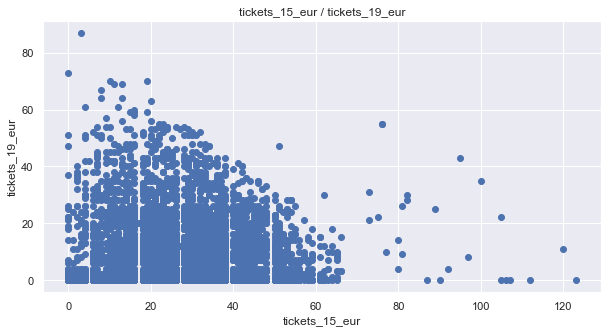

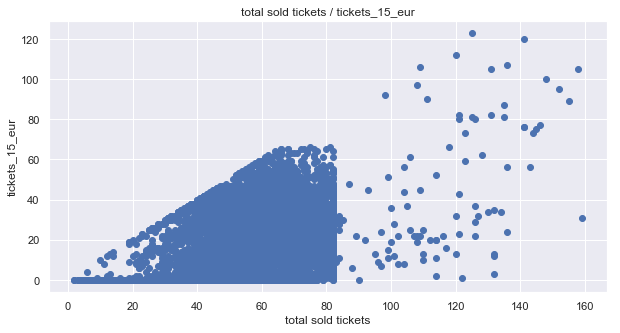

In [23]:
# strong correlations 
plot_x_y(x=data.year,           xlabel='year',               ylabel='tickets_9_eur',  y=data.tickets_9_eur,  which='correlation')
plot_x_y(x=data.tickets_12_eur, xlabel='tickets_12_eur',     ylabel='tickets_9_eur',  y=data.tickets_9_eur,  which='correlation')
plot_x_y(x=data.tickets_15_eur, xlabel='tickets_15_eur',     ylabel='tickets_9_eur',  y=data.tickets_9_eur,  which='correlation')
plot_x_y(x=data.tickets_15_eur, xlabel='tickets_15_eur',     ylabel='tickets_19_eur', y=data.tickets_19_eur, which='correlation')
plot_x_y(x=data.total_ticket,   xlabel='total sold tickets', ylabel='tickets_15_eur', y=data.tickets_15_eur, which='correlation')

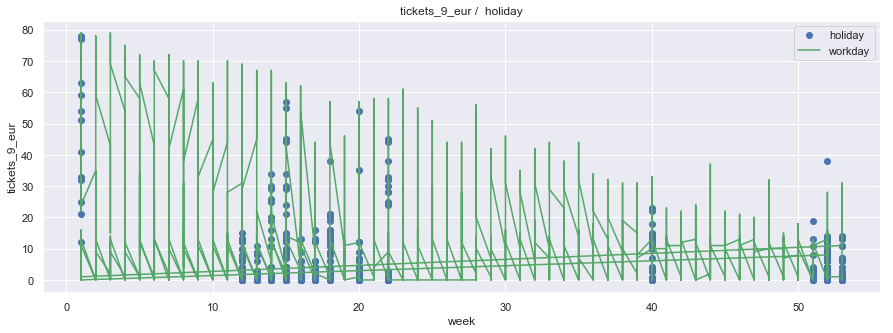

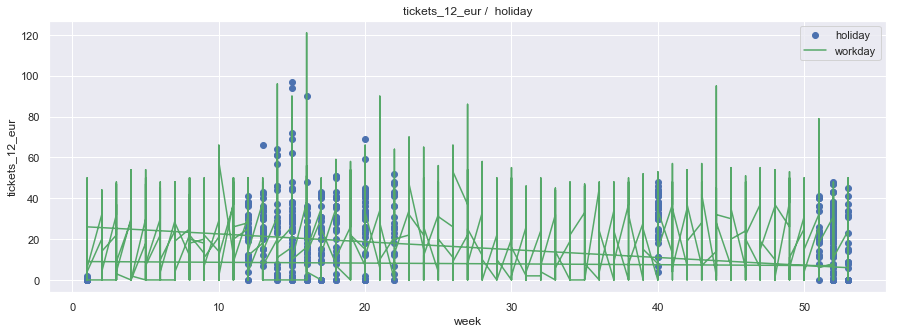

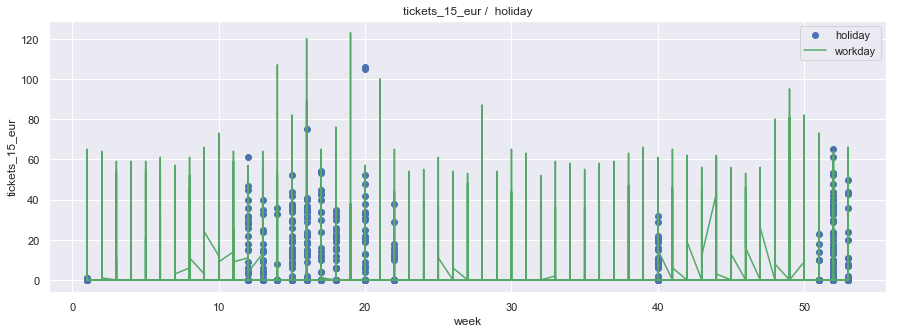

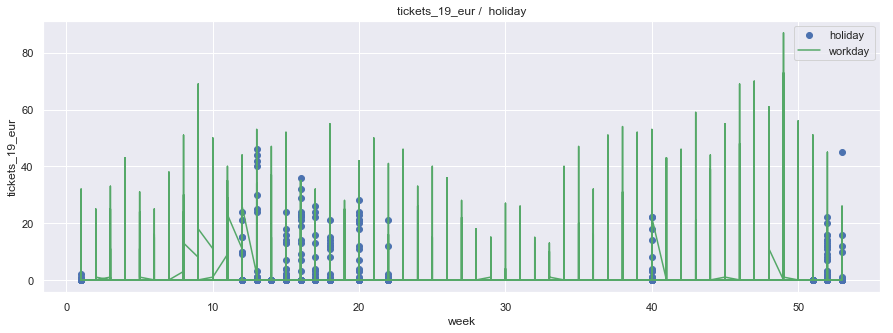

In [24]:
# holiday affect
plot_x_y(x='', xlabel='', y='', ylabel='tickets_9_eur',  which='holiday_affect')
plot_x_y(x='', xlabel='', y='', ylabel='tickets_12_eur', which='holiday_affect')
plot_x_y(x='', xlabel='', y='', ylabel='tickets_15_eur', which='holiday_affect')
plot_x_y(x='', xlabel='', y='', ylabel='tickets_19_eur', which='holiday_affect')

- for the holiday affect on the categories:
    - tickets_9_eur  : almost similarly
    - tickets_12_eur : almost similarly
    - tickets_15_eur : smaller than workday
    - tickets_19_eur : smaller than workday

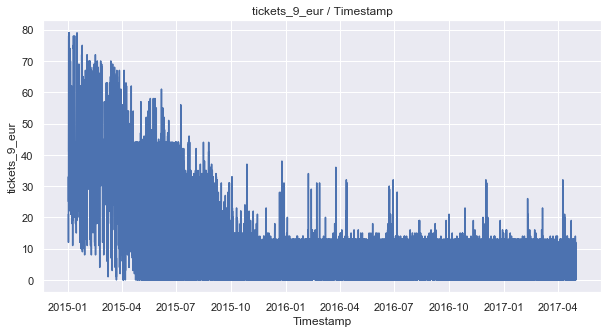

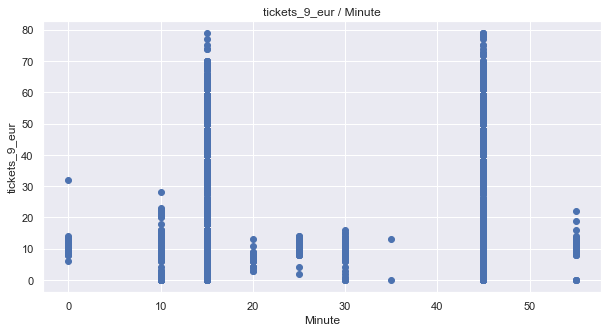

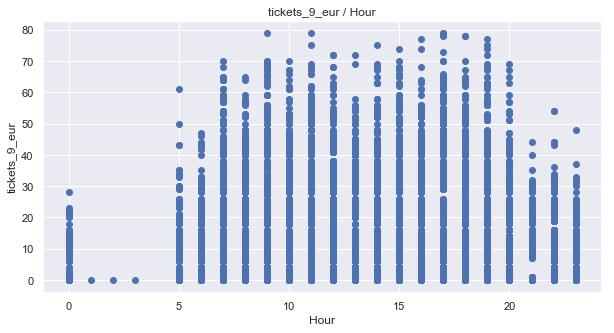

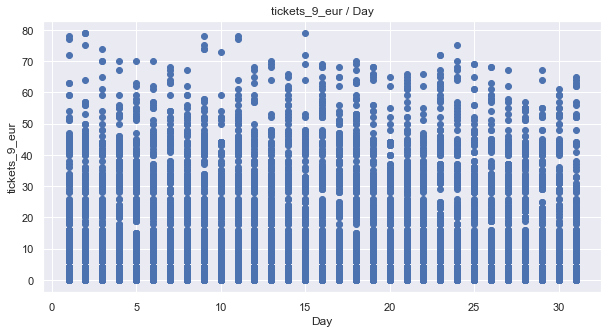

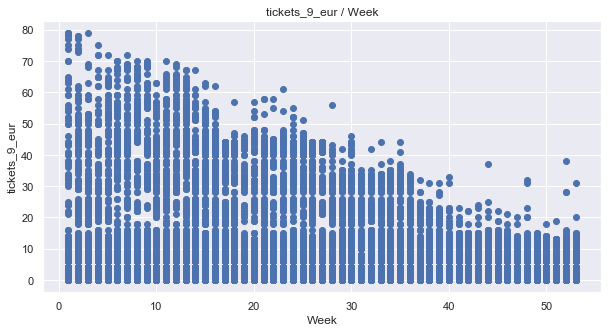

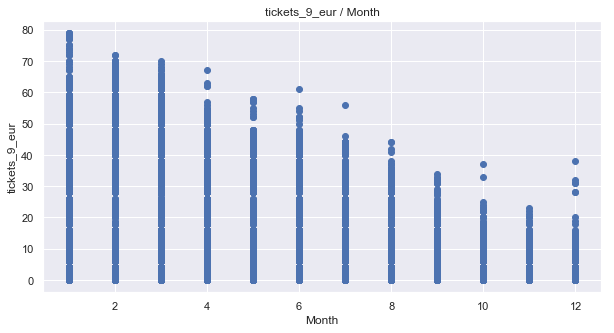

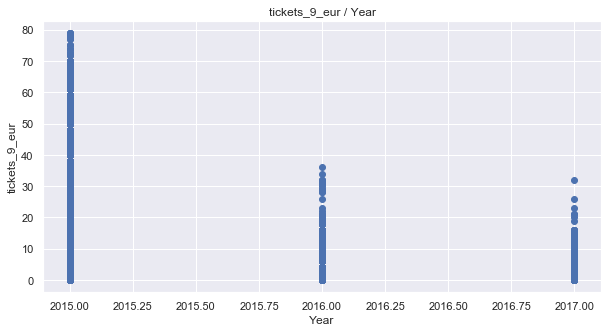

In [25]:
plot_x_y(y=data.tickets_9_eur, ylabel='tickets_9_eur', x='', xlabel='', which='timestamp')

- for the tickets_9_eur: 
    - At the beginning the trend is decreased, after that it is stationary
    - minutes between 15th and 45th are bigger than other minutes because of ride departure
    - hours between 5th and 20th are bigger than other hours because of ride departure
    - for the day it is stationary
    - trend is decreasing by weekly
    - trend is decreasing by monthly
    - trend is decreasing by yearly

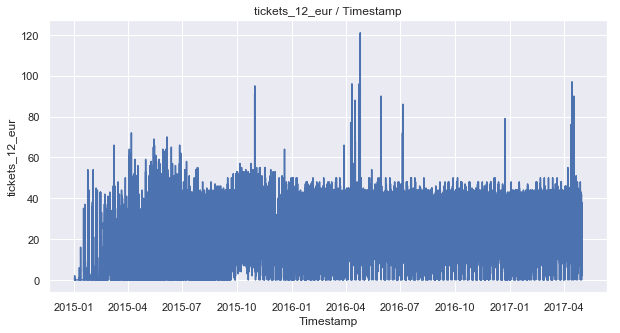

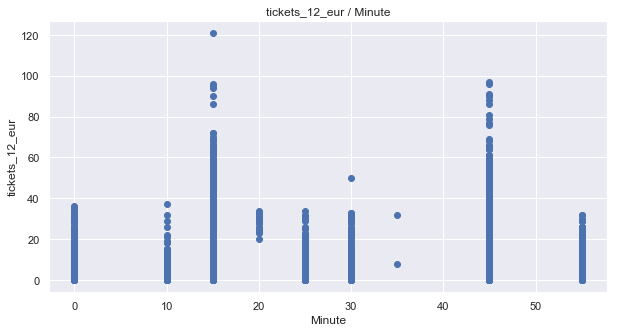

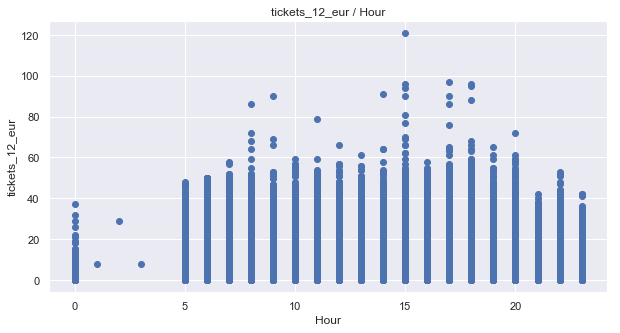

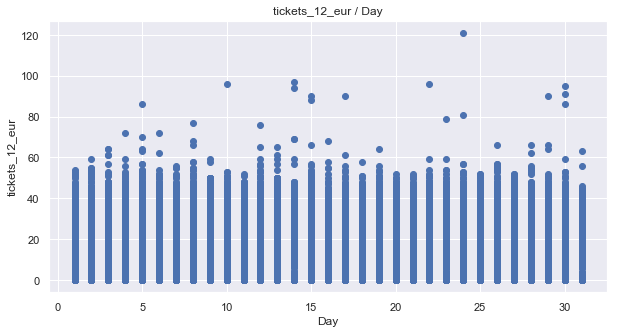

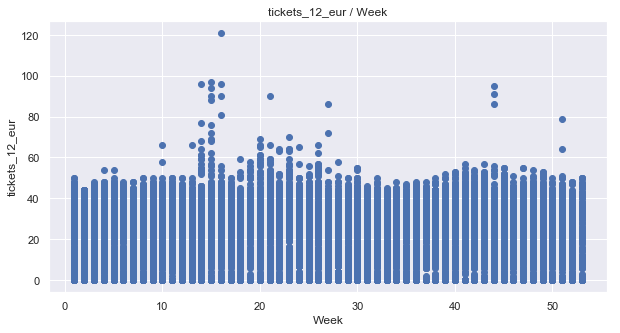

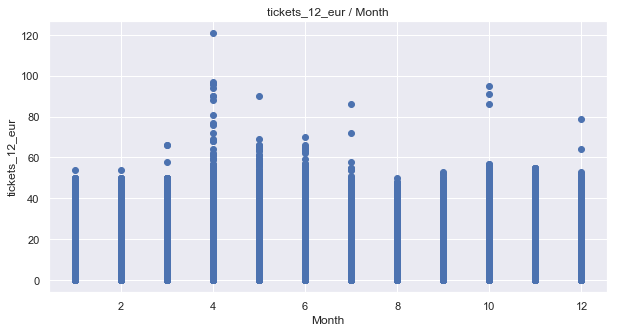

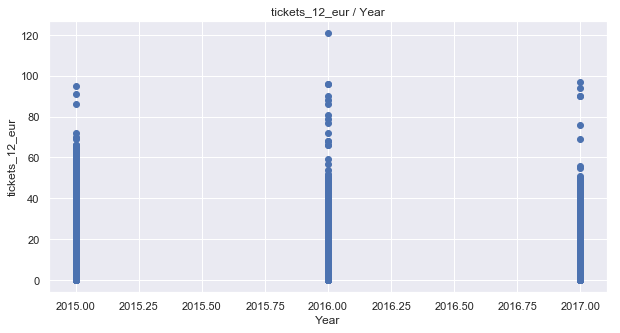

In [26]:
plot_x_y(y=data.tickets_12_eur, ylabel='tickets_12_eur', x='', xlabel='', which='timestamp')

- for the tickets_12_eur: 
    - almost trend is stationary for the all time but 2016-04 higher than other time
    - minutes between 15th and 45th are bigger than other minutes because of ride departure
    - hours between 5th and 20th are bigger than other hours because of ride departure, especially 15th is higher
    - for the day it is stationary
    - generally trend is stationary by weekly but between 15th and 25th week is higher 
    - trend is stationary by monthly but 4th month is higher than other
    - trend is stationary by yearly

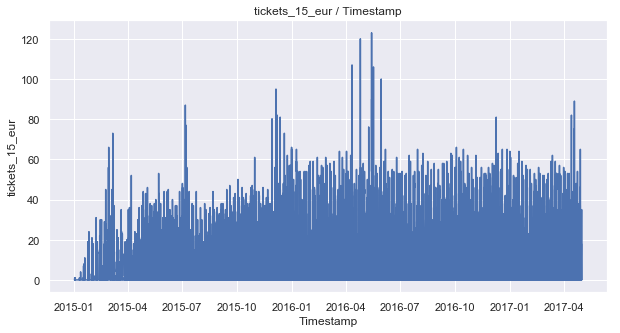

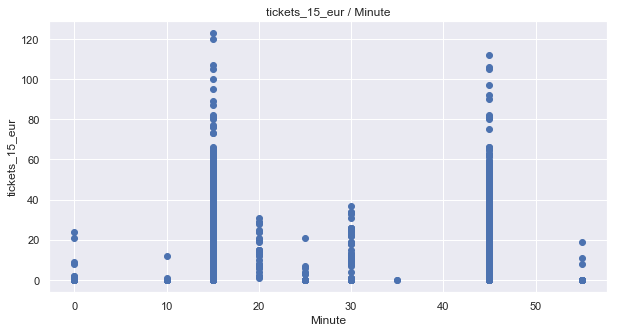

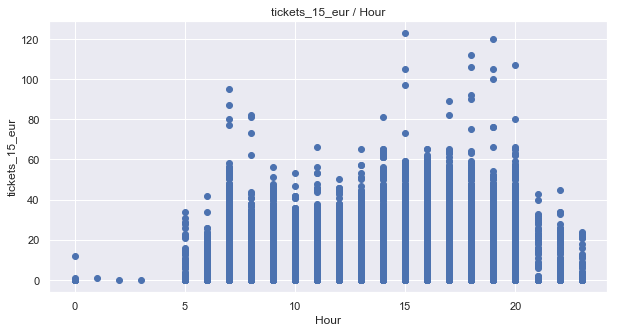

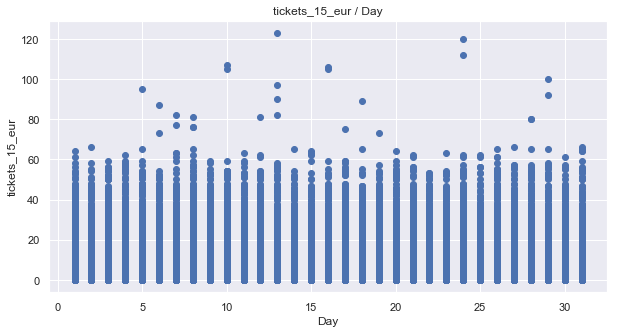

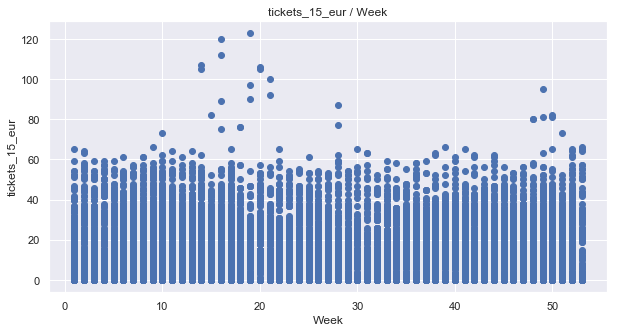

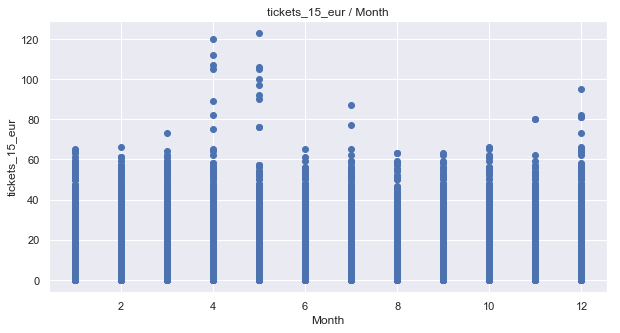

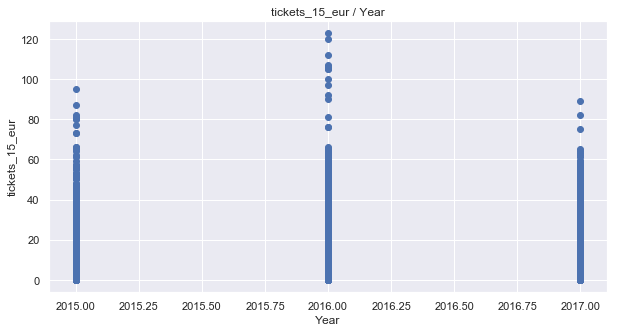

In [27]:
plot_x_y(y=data.tickets_15_eur, ylabel='tickets_15_eur', x='', xlabel='', which='timestamp')

- for the tickets_15_eur: 
    - almost trend is stationary for the all time but it is increasing a little bit by the time
    - minutes between 15th and 45th are bigger than other minutes because of ride departure
    - hours between 5th and 20th are bigger than other hours because of ride departure
    - generally it is stationary for the day
    - generally trend is stationary by weekly but between 15th and 20th week is higher
    - trend is stationary by monthly except 4th and 5th month
    - for the year analysis; 2015 and 2017 is same but 2017 is higher

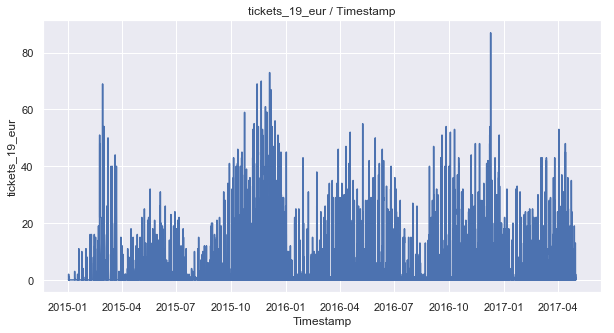

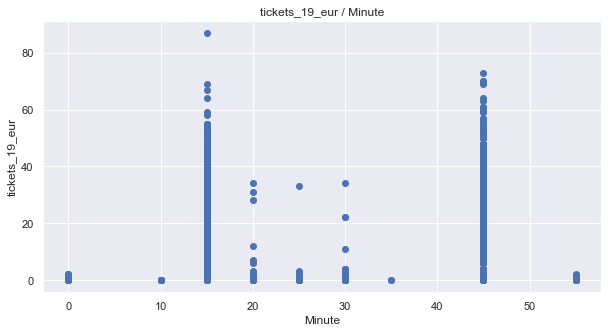

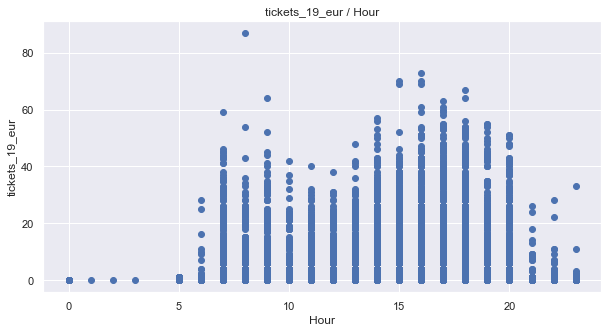

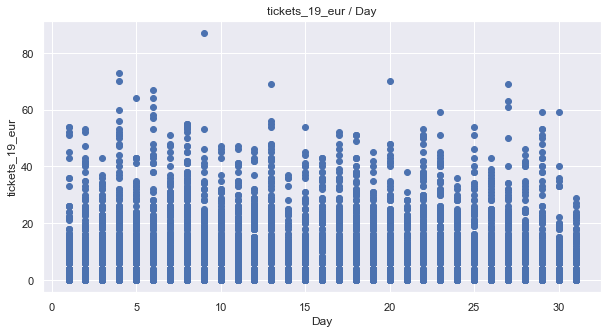

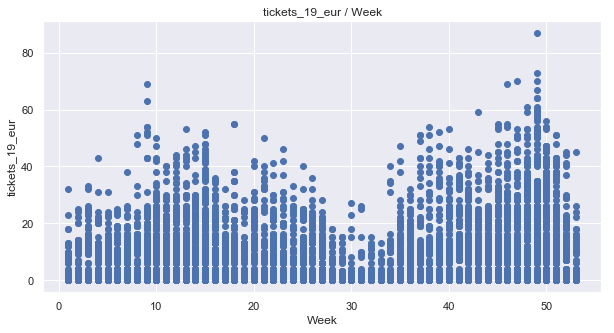

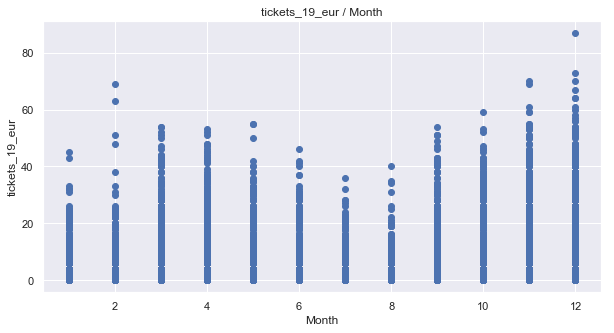

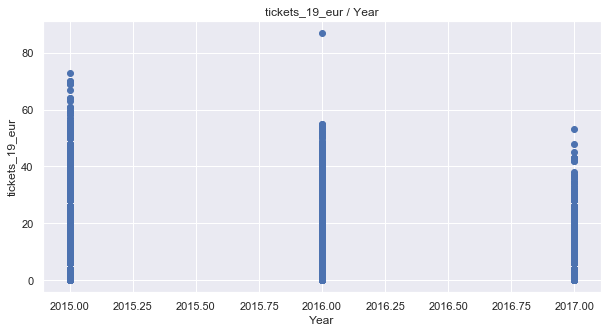

In [28]:
plot_x_y(y=data.tickets_19_eur, ylabel='tickets_19_eur', x='', xlabel='', which='timestamp')

- for the tickets_19_eur:
    - trend is changing month by month
    - minutes between 15th and 45th are bigger than other minutes because of ride departure
    - hourly; trend is increasing between 5th and 8th and also 12th and 17th on the other hand trend is decreasing between 8th and 12th and also 17th and 24th
    - generally it is stationary for the day
    - weekly; trend is increasing between 1st and 15th and also 30th and 50th on the other hand trend is decreasing between 15th and 30th
    - monhtly; trend is increasing between 1st and 3th and also 7th and 12th on the other hand trend is decreasing between 4th and 7th
    - trend is decreased by yearly

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


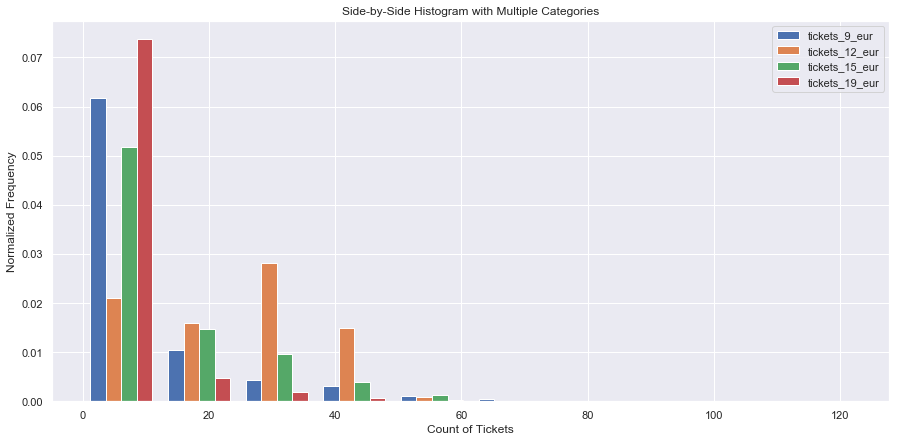

In [29]:
# Histogram of Categories
x1 = list(data['tickets_9_eur'])
x2 = list(data['tickets_12_eur'])
x3 = list(data['tickets_15_eur'])
x4 = list(data['tickets_19_eur'])

names = ['tickets_9_eur', 'tickets_12_eur', 'tickets_15_eur', 'tickets_19_eur']

fig = plt.figure(figsize=(15,7))

_=plt.hist([x1, x2, x3, x4], normed=True, label=names)
_=plt.xlabel('Count of Tickets')
_=plt.ylabel('Normalized Frequency')
_=plt.title('Side-by-Side Histogram with Multiple Categories')
_=plt.legend(loc='best')
plt.show();

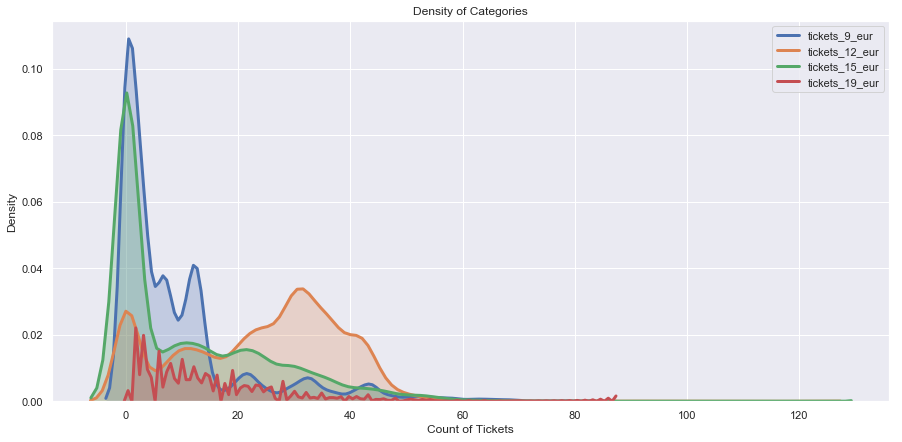

In [30]:
# Density of Categories
categories = ['tickets_9_eur', 'tickets_12_eur', 'tickets_15_eur','tickets_19_eur']

fig = plt.figure(figsize=(15,7))

for category in categories:
    _=sns.distplot(data[category], hist = False, kde = True, kde_kws = {'shade':True, 'linewidth':3}, label = category)
    
_=plt.legend(loc='best')
_=plt.title('Density of Categories')
_=plt.xlabel('Count of Tickets')
_=plt.ylabel('Density')
plt.show();

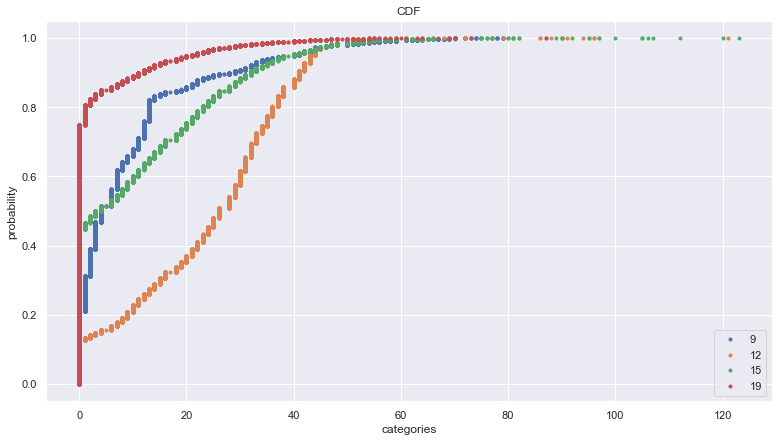

In [31]:
len_data1 = len(data.tickets_9_eur)
data_array1 = np.arange(0,len_data1)
probability1 = data_array1/len_data1
    
len_data2 = len(data.tickets_12_eur)
data_array2 = np.arange(0,len_data2)
probability2 = data_array2/len_data2

len_data3 = len(data.tickets_15_eur)
data_array3 = np.arange(0,len_data3)
probability3 = data_array3/len_data3

len_data4 = len(data.tickets_19_eur)
data_array4 = np.arange(0,len_data4)
probability4 = data_array4/len_data4

fig = plt.figure(figsize=(13,7))

p1, = plt.plot(np.sort(data.tickets_9_eur), probability1, marker='.', linestyle='none')
p2, = plt.plot(np.sort(data.tickets_12_eur), probability2, marker='.', linestyle='none')
p3, = plt.plot(np.sort(data.tickets_15_eur), probability3, marker='.', linestyle='none')
p4, = plt.plot(np.sort(data.tickets_19_eur), probability4, marker='.', linestyle='none')
    
plt.legend([p1, p2, p3, p4], ['9','12', '15', '19'], loc='best')
plt.xlabel('categories')
plt.ylabel('probability')
plt.title('CDF')
plt.show();

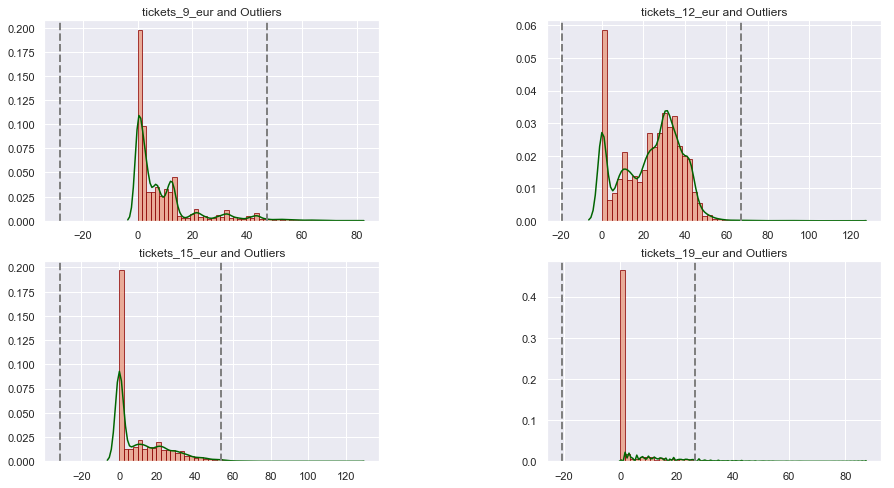

In [32]:
# outlier analysis
fig = plt.figure(figsize=(15,7))
fig.subplots_adjust(top=1, wspace=0.5)

for i, column in enumerate(columns):
    fig.add_subplot(2,2,i+1)
    u = data[column].mean()
    s = data[column].std()
    o_plus = u+3*s
    o_minus = u-3*s
    sns.distplot(data[column], 
                 kde_kws={"alpha":1,"color":"darkgreen"}, 
                 hist_kws={"alpha":0.75,"color":"darksalmon", "edgecolor":"darkred"})
    plt.axvline(o_plus, color='grey', linestyle='dashed', linewidth=2)
    plt.axvline(o_minus, color='grey', linestyle='dashed', linewidth=2)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column + ' and Outliers')
    
plt.show();

# that is amazing!!!

## 1.3 Check Algorithms

In [33]:
#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen

data_stationary = data[['tickets_9_eur', 'tickets_12_eur', 'tickets_15_eur', 'tickets_19_eur']]
data_stationary.index = data.ride_departure

johan_test_temp = data_stationary
coint_johansen(johan_test_temp,-1,1).eig

# result is perfect, they are stationary.

array([0.15595109, 0.07649429, 0.04796038, 0.00892201])

In [34]:
# convert series to supervised learning
def convert_to_supervised(convert_data, columns, s_input=1, s_output=1, dropnan=True):
    #shape, cols, names
    shape = convert_data.shape[1]
    cols = list()
    names = list()
    df = pd.DataFrame(convert_data)
    
    #fill cols and names
    for i in range(s_input, 0, -1):
        cols.append(df.shift(i))
        for j in range(shape):
            names += [str(columns[j]) + ('_t-%d' % (i))]
    
    for i in range(0, s_output, 1):
        cols.append(df.shift(-i))
        if i == 0:
            for j in range(shape):
                names += [str(columns[j]) + ('_t-%d' % (i))]
        else:
            for j in range(shape):
                names += [str(columns[j]) + ('_t-%d' % (i))]
    
    #create new dataframe
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    #remove nan
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

In [35]:
# create dataset for the regression analysis
data_model_reg = pd.DataFrame()
data_model_reg = data[['year', 'month', 'week', 'day', 'hour', 'minute',
                       'holiday', 'direction', 'capacity',
                       'tickets_9_eur', 'tickets_12_eur', 'tickets_15_eur', 'tickets_19_eur']]
data_model_reg.index = data.ride_departure

values = data_model_reg.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

reframed = pd.DataFrame(data=scaled, index=data_model_reg.index, columns=data_model_reg.columns)

# columns = data_model_reg.columns
# reframed = convert_to_supervised(values, columns, 25, 1,)
# reframed.index = data.iloc[:len(reframed),:]['ride_departure']

# data_model_reg = reframed

# data_model_reg = data_model_reg.rename(columns = {'tickets_9_eur_t-0':'tickets_9_eur', 
#                                                  'tickets_12_eur_t-0':'tickets_12_eur',
#                                                  'tickets_15_eur_t-0':'tickets_15_eur',
#                                                  'tickets_19_eur_t-0':'tickets_19_eur'})

reframed.head(5)

year  month  week  day      hour    minute  holiday  \
ride_departure                                                             
2015-01-01 08:15:00   0.0    0.0   0.0  0.0  0.347826  0.272727      1.0   
2015-01-01 09:15:00   0.0    0.0   0.0  0.0  0.391304  0.272727      1.0   
2015-01-01 10:15:00   0.0    0.0   0.0  0.0  0.434783  0.272727      1.0   
2015-01-01 11:45:00   0.0    0.0   0.0  0.0  0.478261  0.818182      1.0   
2015-01-01 12:45:00   0.0    0.0   0.0  0.0  0.521739  0.818182      1.0   

                     direction  capacity  tickets_9_eur  tickets_12_eur  \
ride_departure                                                            
2015-01-01 08:15:00        1.0  0.245614       0.265823             0.0   
2015-01-01 09:15:00        0.0  0.245614       0.151899             0.0   
2015-01-01 10:15:00        1.0  0.245614       0.417722             0.0   
2015-01-01 11:45:00        0.0  0.245614       0.316456             0.0   
2015-01-01 12:45:00        1.0  0.245614       0.405063             0.0   

                     tickets_15_eur  tickets_19_eur  
ride_departure                                       
2015-01-01 08:15:00             0.0             0.0  
2015-01-01 09:15:00             0.0             0.0  
2015-01-01 10:15:00             0.0             0.0  
2015-01-01 11:45:00             0.0             0.0  
2015-01-01 12:45:00             0.0             0.0

In [36]:
# train and test data for regression
column = ['tickets_9_eur', 'tickets_12_eur', 'tickets_15_eur', 'tickets_19_eur']
data_model_reg_train = reframed[:int(0.8*(len(reframed)))]
data_model_reg_test = reframed[int(0.8*(len(reframed))):]

X_train = data_model_reg_train.drop(columns=column)
y_train = data_model_reg_train[column]
X_test = data_model_reg_test.drop(columns=column)
y_test = data_model_reg_test[column]

print('reg train shape :', data_model_reg_train.shape)
print('reg test shape  :', data_model_reg_test.shape)

X_train.head(2)
y_train.head(2)
X_test.head(2)
y_test.head(2)

reg train shape : (15455, 13)
reg test shape  : (3864, 13)


year  month  week  day      hour    minute  holiday  \
ride_departure                                                             
2015-01-01 08:15:00   0.0    0.0   0.0  0.0  0.347826  0.272727      1.0   
2015-01-01 09:15:00   0.0    0.0   0.0  0.0  0.391304  0.272727      1.0   

                     direction  capacity  
ride_departure                            
2015-01-01 08:15:00        1.0  0.245614  
2015-01-01 09:15:00        0.0  0.245614

tickets_9_eur  tickets_12_eur  tickets_15_eur  \
ride_departure                                                       
2015-01-01 08:15:00       0.265823             0.0             0.0   
2015-01-01 09:15:00       0.151899             0.0             0.0   

                     tickets_19_eur  
ride_departure                       
2015-01-01 08:15:00             0.0  
2015-01-01 09:15:00             0.0

year  month      week  day      hour    minute  holiday  \
ride_departure                                                                 
2016-12-04 19:45:00   0.5    1.0  0.903846  0.1  0.826087  0.818182      0.0   
2016-12-04 20:15:00   0.5    1.0  0.903846  0.1  0.869565  0.272727      0.0   

                     direction  capacity  
ride_departure                            
2016-12-04 19:45:00        0.0  0.245614  
2016-12-04 20:15:00        1.0  0.245614

tickets_9_eur  tickets_12_eur  tickets_15_eur  \
ride_departure                                                       
2016-12-04 19:45:00       0.000000        0.066116        0.333333   
2016-12-04 20:15:00       0.012658        0.024793        0.300813   

                     tickets_19_eur  
ride_departure                       
2016-12-04 19:45:00        0.045977  
2016-12-04 20:15:00        0.321839

In [37]:
# create dataset for the time series analysis
data_model_ts = pd.DataFrame()
data_model_ts = data[['tickets_9_eur', 'tickets_12_eur', 'tickets_15_eur', 'tickets_19_eur']]
data_model_ts.index = data.ride_departure
data_model_ts.head(5)

tickets_9_eur  tickets_12_eur  tickets_15_eur  \
ride_departure                                                       
2015-01-01 08:15:00           21.0             0.0             0.0   
2015-01-01 09:15:00           12.0             0.0             0.0   
2015-01-01 10:15:00           33.0             0.0             0.0   
2015-01-01 11:45:00           25.0             0.0             0.0   
2015-01-01 12:45:00           32.0             0.0             0.0   

                     tickets_19_eur  
ride_departure                       
2015-01-01 08:15:00             0.0  
2015-01-01 09:15:00             0.0  
2015-01-01 10:15:00             0.0  
2015-01-01 11:45:00             0.0  
2015-01-01 12:45:00             0.0

In [38]:
# train and test set for the time series analysis
data_model_ts_train = data_model_ts[:int(0.8*(len(data_model_ts)))]
data_model_ts_test = data_model_ts[int(0.8*(len(data_model_ts))):]

print('ts train shape :', data_model_ts_train.shape)
print('ts test shape  :', data_model_ts_test.shape)

data_model_ts_train.head(2)
data_model_ts_test.head(2)

ts train shape : (15455, 4)
ts test shape  : (3864, 4)


tickets_9_eur  tickets_12_eur  tickets_15_eur  \
ride_departure                                                       
2015-01-01 08:15:00           21.0             0.0             0.0   
2015-01-01 09:15:00           12.0             0.0             0.0   

                     tickets_19_eur  
ride_departure                       
2015-01-01 08:15:00             0.0  
2015-01-01 09:15:00             0.0

tickets_9_eur  tickets_12_eur  tickets_15_eur  \
ride_departure                                                       
2016-12-04 19:45:00            0.0             8.0            41.0   
2016-12-04 20:15:00            1.0             3.0            37.0   

                     tickets_19_eur  
ride_departure                       
2016-12-04 19:45:00             4.0  
2016-12-04 20:15:00            28.0

In [39]:
# multiple output
from sklearn.multioutput import MultiOutputRegressor
column = ['tickets_9_eur', 'tickets_12_eur', 'tickets_15_eur', 'tickets_19_eur']

# accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

accuracy_dict = {}

# calculate mape
def calc_mape(y_test, prediction):
    error = abs(prediction - y_test)
    mape = np.mean(100 * (error / y_test))
    return round(mape, 4)

### 1-Regression Analysis

In [40]:
# Plot Regression
def plot_Regression(y_test, prediction, test_index, column, title, acc):
    if 'dict_reg' not in accuracy_dict:
        accuracy_dict['dict_reg'] = {}
    
    if acc not in accuracy_dict['dict_reg']:
        accuracy_dict['dict_reg'][acc] = {}

    for i, c in enumerate(column):
        if c not in accuracy_dict['dict_reg'][acc]:
            accuracy_dict['dict_reg'][acc][c] = {}
        
        if 'mae' not in accuracy_dict['dict_reg'][acc][c]:
            accuracy_dict['dict_reg'][acc][c]['mae'] = {}
            
        if 'mape' not in accuracy_dict['dict_reg'][acc][c]:
            accuracy_dict['dict_reg'][acc][c]['mape'] = {}
        
        if 'r2' not in accuracy_dict['dict_reg'][acc][c]:
            accuracy_dict['dict_reg'][acc][c]['r2'] = {}

        mae  = mean_absolute_error(y_test[c], prediction[:,i])
        mape = calc_mape(y_test[c], prediction[:,i])
        r2   = r2_score(y_test[c], prediction[:,i])
        
        accuracy_dict['dict_reg'][acc][c]['mae']  = mae
        accuracy_dict['dict_reg'][acc][c]['mape'] = mape
        accuracy_dict['dict_reg'][acc][c]['r2']   = r2
        
        _=plt.figure(figsize=(10,5))
        _=plt.plot(test_index, y_test[c], color='blue', label='test')
        _=plt.plot(test_index, prediction[:,i], color='orange', label='predict')
        _=plt.xlabel('Time')
        _=plt.ylabel('Test and Predict')
        _=plt.title(title + ' for ' + c + '   &  MAE = ' + str(mae))
        _=plt.legend(loc='best')
        plt.show();
        
    if 'total_mae' not in accuracy_dict['dict_reg'][acc]:
        accuracy_dict['dict_reg'][acc]['total_mae'] = {}
        
    total_mae = mean_absolute_error(y_test, prediction)
    accuracy_dict['dict_reg'][acc]['total_mae'] = total_mae

In [41]:
# rescale
def rescale(X_test, y_test, prediction):
    # rescaling for prediction
    inv_prediction = np.concatenate((X_test.values, prediction), axis=1)
    inv_prediction = scaler.inverse_transform(inv_prediction)
    inv_prediction = inv_prediction[:,-4:]
    
    # rescaling for actual
    inv_y = np.concatenate((X_test.values, y_test.values), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-4:]
    
    return inv_y, inv_prediction

In [42]:
# Apply Regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.model_selection import train_test_split

def apply_Reg(reg_tech):
    if reg_tech == 'LR':
        regressor = MultiOutputRegressor(LinearRegression())
        regressor.fit(X_train, y_train)
        
        prediction = regressor.predict(X_test)
        res_y, res_prediction = rescale(X_test, y_test, prediction)
        test_index = X_test.index.values
        res_y = pd.DataFrame(data=res_y, index=test_index, columns=column)
        
        plot_Regression(res_y, res_prediction, test_index, column, 'Linear Regression', 'LR')
        
    elif reg_tech == 'SVR':
        regressor= MultiOutputRegressor(LinearSVR())
        regressor.fit(X_train, y_train)
        
        prediction = regressor.predict(X_test)
        res_y, res_prediction = rescale(X_test, y_test, prediction)
        test_index = X_test.index.values
        res_y = pd.DataFrame(data=res_y, index=test_index, columns=column)
        
        plot_Regression(res_y, res_prediction, test_index, column, 'Support Vector Regression', 'SVR')
        
    elif reg_tech == 'DTR':
        regressor = MultiOutputRegressor(DecisionTreeRegressor())
        regressor.fit(X_train, y_train)
        
        prediction = regressor.predict(X_test)
        res_y, res_prediction = rescale(X_test, y_test, prediction)
        test_index = X_test.index.values
        res_y = pd.DataFrame(data=res_y, index=test_index, columns=column)
        
        plot_Regression(res_y, res_prediction, test_index, column, 'Decision Tree Regression', 'DTR')
        
    elif reg_tech == 'RFR':
        regressor = MultiOutputRegressor(RandomForestRegressor())
        regressor.fit(X_train, y_train)
        
        prediction = regressor.predict(X_test)
        res_y, res_prediction = rescale(X_test, y_test, prediction)
        test_index = X_test.index.values
        res_y = pd.DataFrame(data=res_y, index=test_index, columns=column)
        
        plot_Regression(res_y, res_prediction, test_index, column, 'Random Forest Regression', 'RFR')
    
    elif reg_tech == 'PR':
        pr_train = data_model_reg[:int(0.8*(len(data_model_reg)))]
        pr_test = data_model_reg[int(0.8*(len(data_model_reg))):]
        
        i_train = pr_train.drop(columns=column)
        o_train = pr_train[column]
        i_test = pr_test.drop(columns=column)
        o_test = pr_test[column]
        
        regressor = LinearRegression()
        poly_features = PolynomialFeatures()
        X_train_poly = poly_features.fit_transform(i_train)
        regressor.fit(X_train_poly, o_train)
        
        y_test_poly = poly_features.fit_transform(i_test)
        prediction = regressor.predict(y_test_poly)
        test_index = X_test.index.values
        
        plot_Regression(y_test, prediction, test_index, column, 'Polynomial Regression', 'PR')
    else:
        pass

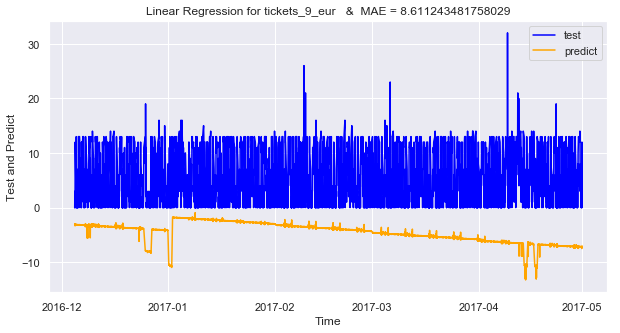

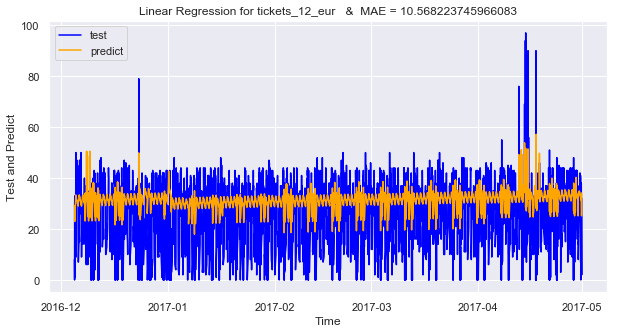

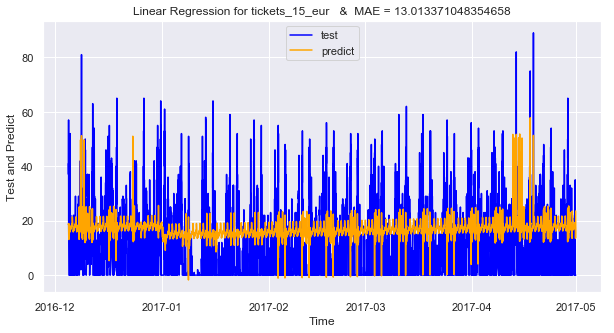

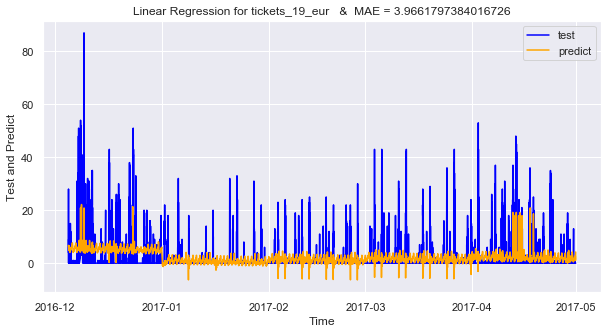

In [43]:
apply_Reg('LR')

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


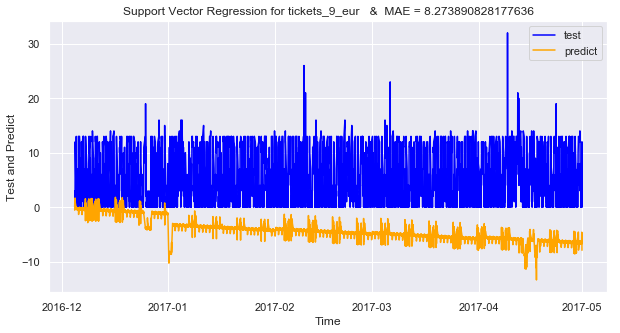

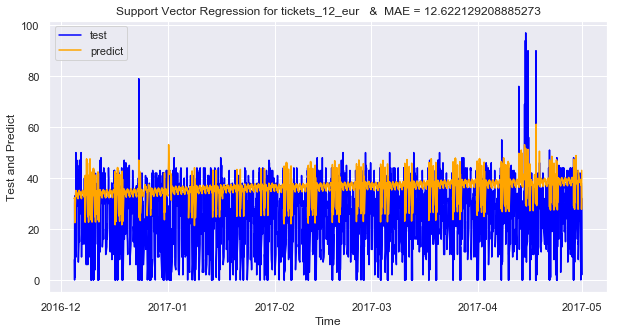

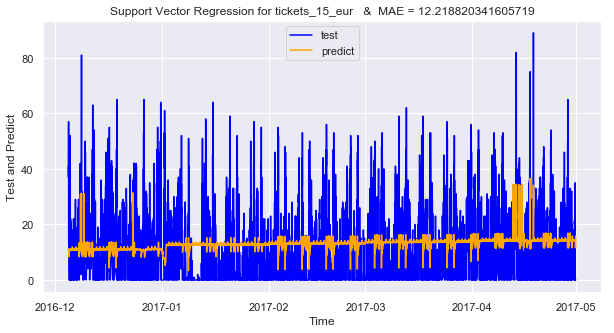

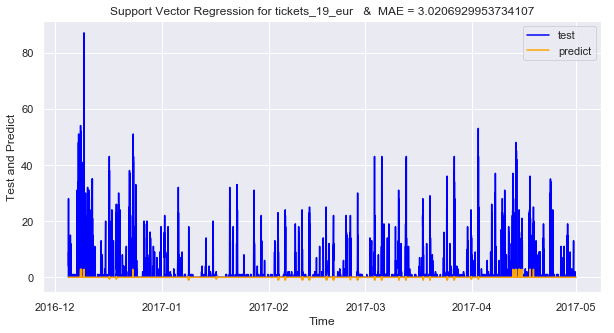

In [44]:
apply_Reg('SVR')

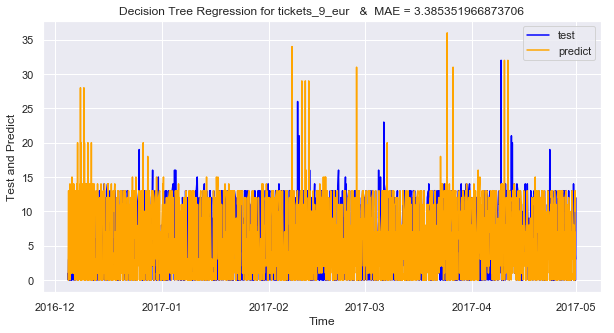

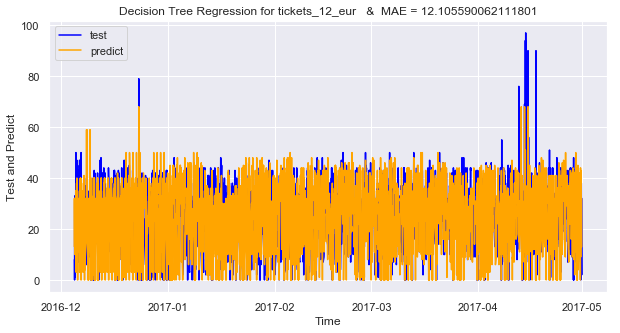

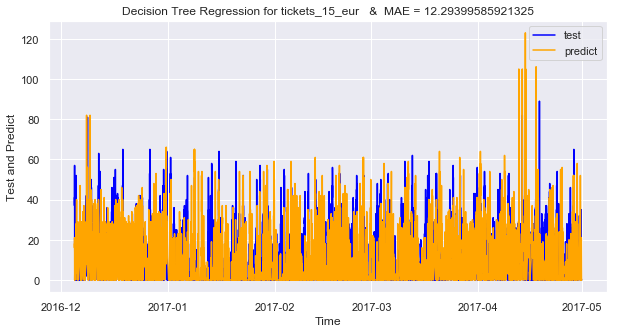

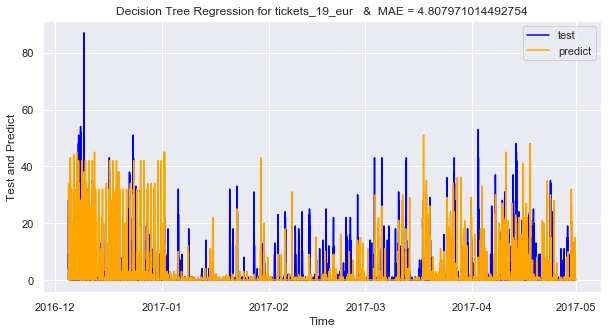

In [45]:
apply_Reg('DTR')

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

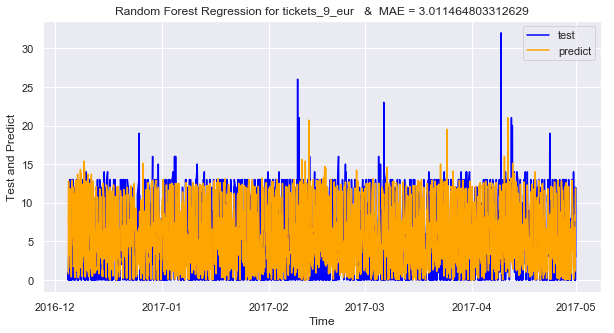

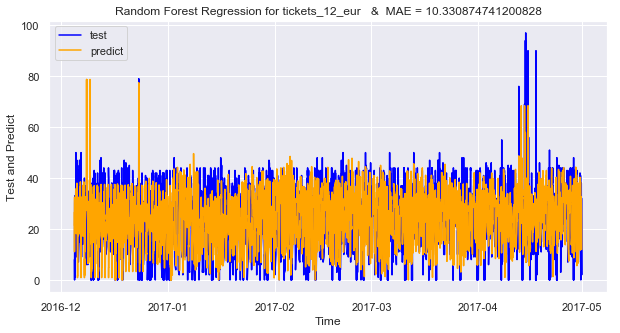

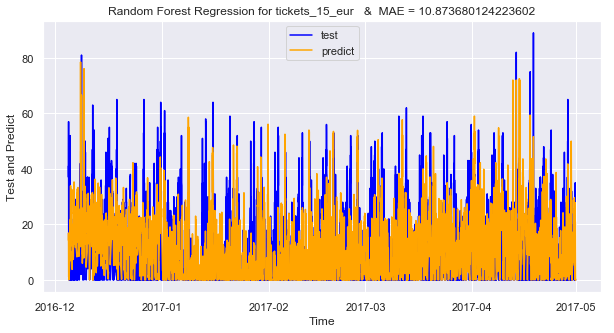

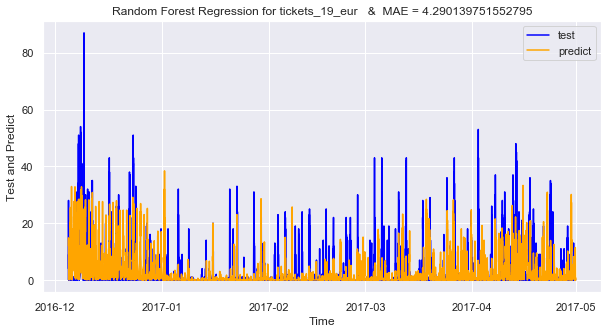

In [46]:
apply_Reg('RFR')

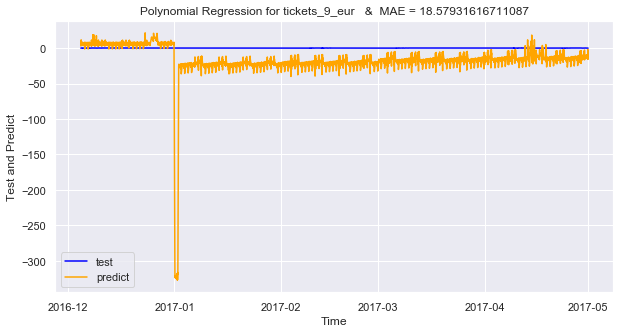

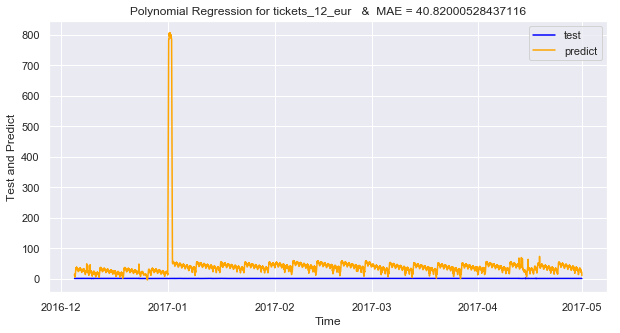

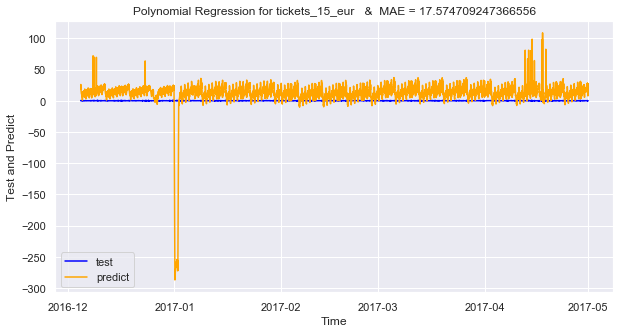

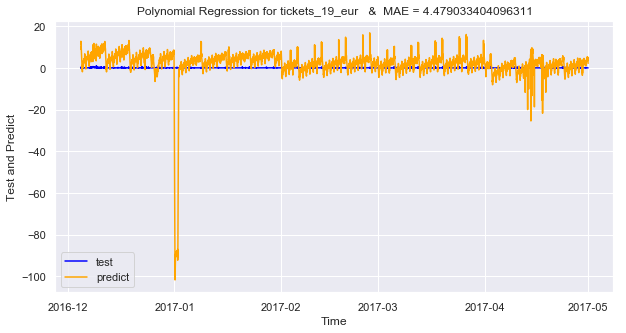

In [47]:
apply_Reg('PR')

In [48]:
accuracy_dict

{'dict_reg': {'DTR': {'tickets_12_eur': {'mae': 12.105590062111801,
    'mape': inf,
    'r2': -0.5130285106202426},
   'tickets_15_eur': {'mae': 12.29399585921325,
    'mape': inf,
    'r2': -0.4852489756943843},
   'tickets_19_eur': {'mae': 4.807971014492754,
    'mape': inf,
    'r2': -0.7674357510529835},
   'tickets_9_eur': {'mae': 3.385351966873706,
    'mape': inf,
    'r2': -0.26531630843034315},
   'total_mae': 8.148227225672878},
  'LR': {'tickets_12_eur': {'mae': 10.568223745966083,
    'mape': inf,
    'r2': -0.1349417245560809},
   'tickets_15_eur': {'mae': 13.013371048354658,
    'mape': inf,
    'r2': -0.06309234176398992},
   'tickets_19_eur': {'mae': 3.9661797384016726,
    'mape': inf,
    'r2': 0.034440239130374306},
   'tickets_9_eur': {'mae': 8.611243481758029,
    'mape': inf,
    'r2': -3.8968961591451725},
   'total_mae': 9.03975450362011},
  'PR': {'tickets_12_eur': {'mae': 40.82000528437116,
    'mape': inf,
    'r2': -537433.4524945696},
   'tickets_15_eur': 

### 2-Time Series Analysis

In [49]:
# plot time series
def plot_TS(learning, learning_index, validation, validation_index, prediction, col, model):
    if 'dict_ts' not in accuracy_dict:
        accuracy_dict['dict_ts'] = {}

    if model not in accuracy_dict['dict_ts']:
        accuracy_dict['dict_ts'][model] = {}

    if col not in accuracy_dict['dict_ts'][model]:
        accuracy_dict['dict_ts'][model][col] = {}

    if 'mae' not in accuracy_dict['dict_ts'][model][col]:
        accuracy_dict['dict_ts'][model][col]['mae'] = {}

    if 'mape' not in accuracy_dict['dict_ts'][model][col]:
        accuracy_dict['dict_ts'][model][col]['mape'] = {}

    if 'total_mae' not in accuracy_dict['dict_ts'][model]:
        accuracy_dict['dict_ts'][model]['total_mae'] = {}

    mae = mean_absolute_error(validation, prediction)
    mape = calc_mape(validation, prediction)

    accuracy_dict['dict_ts'][model][col]['mae']  = mae
    accuracy_dict['dict_ts'][model][col]['mape'] = mape

    _=plt.figure(figsize=(12,5))
   # _=plt.plot(learning_index, learning, label='train set')
    _=plt.plot(validation_index, validation, color='blue', label='test set')
    _=plt.plot(validation_index, prediction, color='orange', label='prediction')
    plt.xlabel('Time')
    plt.ylabel(col + ' and Prediction')
    plt.title(model + ' Model for ' + col + '   &   MAE = ' + str(mae))
    plt.legend(loc='best')
    plt.show();

In [50]:
# apply time series
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import Holt, SimpleExpSmoothing, ExponentialSmoothing # Triple Exponential Smoothing

def apply_TS(ts_tech, column):
    
    X = data_model_ts_train[column].values
    train_index = data_model_ts_train.index.values  
    y = data_model_ts_test[column].values
    test_index = data_model_ts_test.index.values
    
    if ts_tech == 'AR':
        model = AR(X)
        model_fit = model.fit()
        prediction = model_fit.predict(start=len(X), end=len(X)+len(y)-1, dynamic=False)
        
    elif ts_tech == 'MA':
        model = ARMA(X, order=(0, 1))
        model_fit = model.fit(disp=False)
        prediction = model_fit.predict(start=len(X), end=len(X)+len(y)-1, dynamic=False)
        
    elif ts_tech == 'ARMA':
        model = ARMA(X, order=(1, 1))
        model_fit = model.fit(disp=False)
        prediction = model_fit.predict(start=len(X), end=len(X)+len(y)-1, dynamic=False)
        
    elif ts_tech == 'ARIMA':
        model = ARIMA(X, order=(1, 1, 1))
        model_fit = model.fit(disp=False)
        prediction = model_fit.predict(start=len(X), end=len(X)+len(y)-1, typ='levels')
        
    elif ts_tech == 'SARIMA':
        model = SARIMAX(X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
        model_fit = model.fit(disp=False)
        prediction = model_fit.predict(start=len(X), end=len(X)+len(y)-1, typ='levels')
        
    elif ts_tech == 'SES':
        #ne seasonality ne trend
        model = SimpleExpSmoothing(X)
        model_fit = model.fit()
        prediction = model_fit.predict(start=len(X), end=len(X)+len(y)-1)
        
    elif ts_tech == 'HWES':
        #yes seasonality yes trend
        model = ExponentialSmoothing(X)
        model_fit = model.fit()
        prediction = model_fit.predict(start=len(X), end=len(X)+len(y)-1)
        
    elif ts_tech == 'HLT':
        #no seasonality yes trend
        model = Holt(X)
        model_fit = model.fit()
        prediction = model_fit.predict(start=len(X), end=len(X)+len(y)-1)
    
    else:
        pass
    
    if ts_tech != '':
        plot_TS(X, train_index, y, test_index, prediction, column, ts_tech)

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


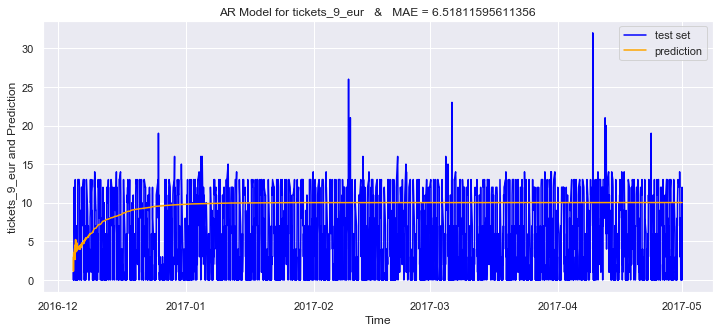

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


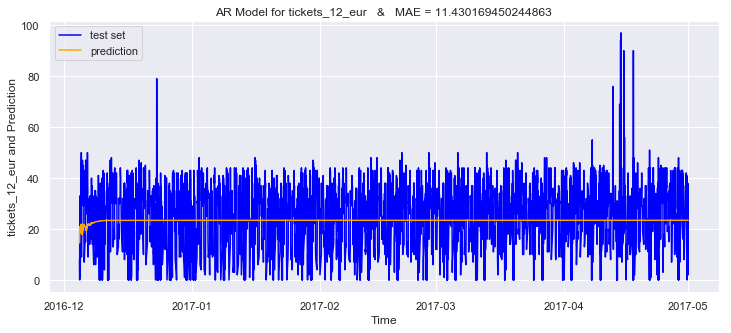

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


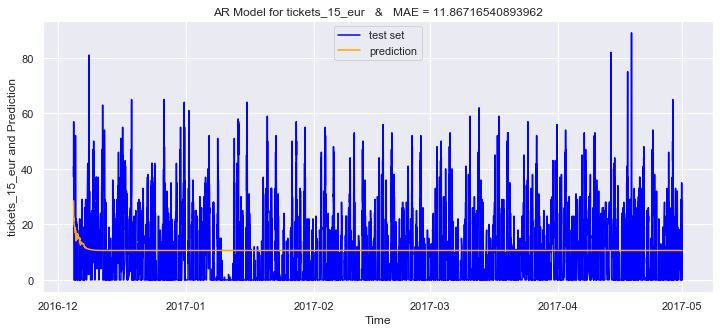

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


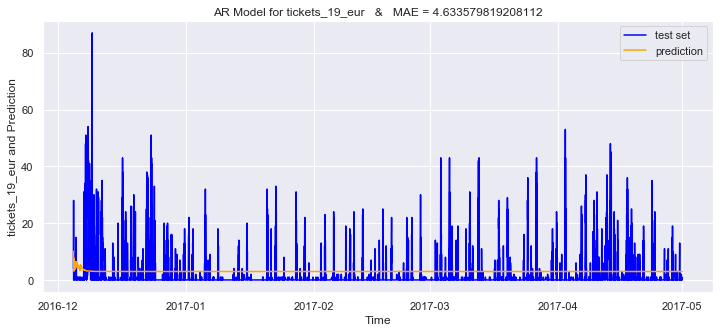

In [51]:
apply_TS('AR', 'tickets_9_eur')
apply_TS('AR', 'tickets_12_eur')
apply_TS('AR', 'tickets_15_eur')
apply_TS('AR', 'tickets_19_eur')

sum_mae = 0
for c in column:
    sum_mae += accuracy_dict['dict_ts']['AR'][c]['mae']
accuracy_dict['dict_ts']['AR']['total_mae'] = (sum_mae/4)

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


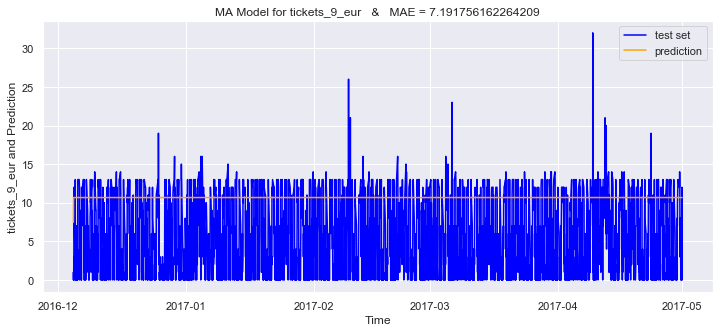

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


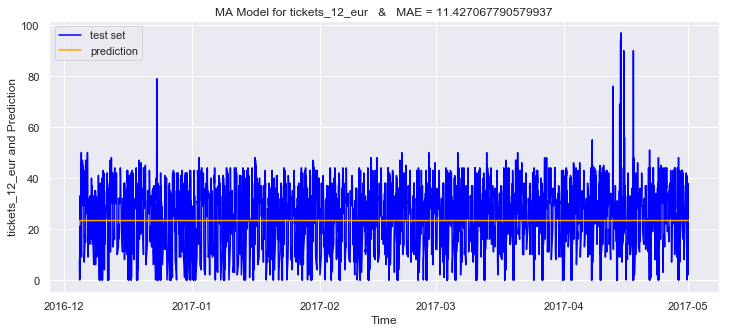

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


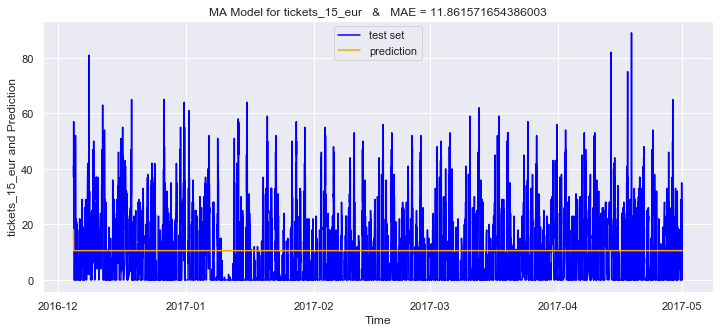

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


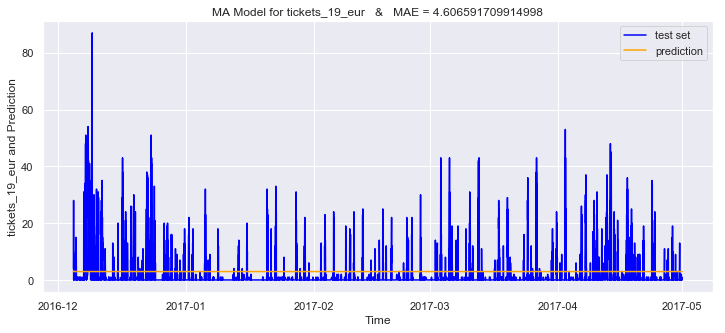

In [52]:
apply_TS('MA', 'tickets_9_eur')
apply_TS('MA', 'tickets_12_eur')
apply_TS('MA', 'tickets_15_eur')
apply_TS('MA', 'tickets_19_eur')


sum_mae = 0
for c in column:
    sum_mae += accuracy_dict['dict_ts']['MA'][c]['mae']
accuracy_dict['dict_ts']['MA']['total_mae'] = (sum_mae/4)

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


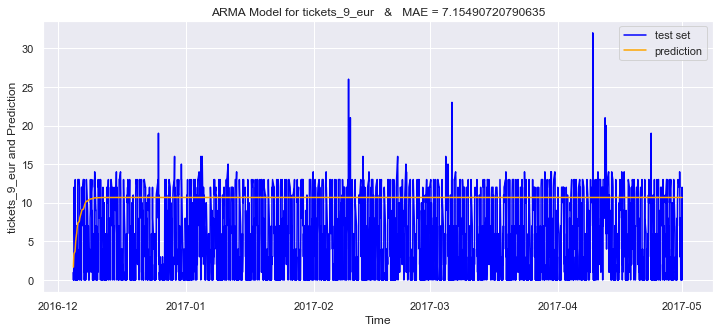

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


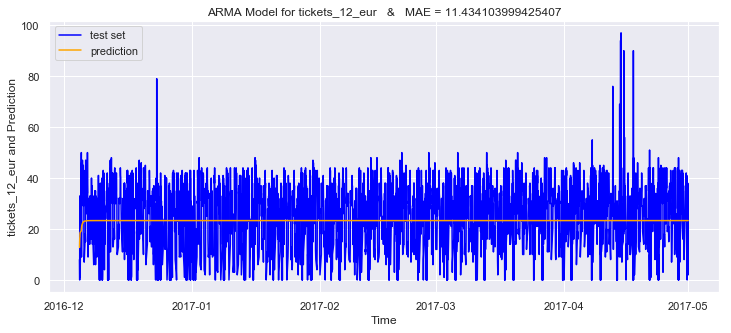

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


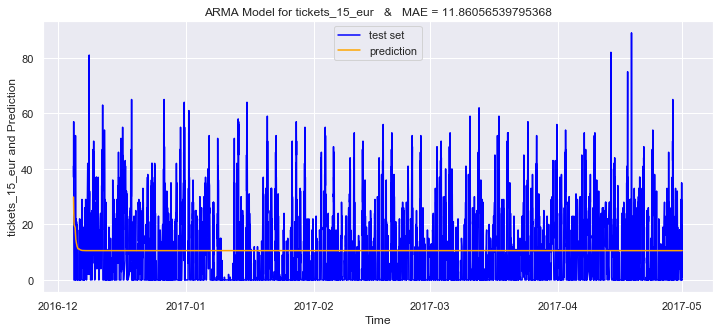

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


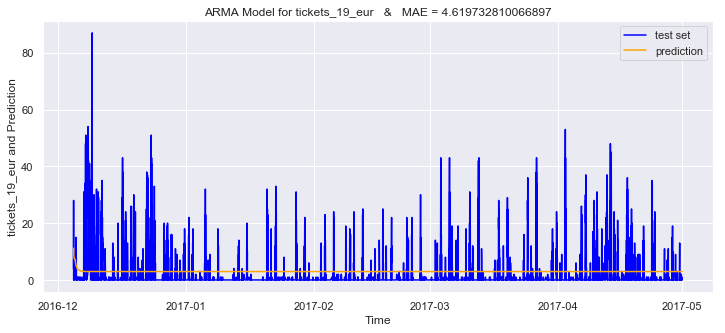

In [53]:
apply_TS('ARMA', 'tickets_9_eur')
apply_TS('ARMA', 'tickets_12_eur')
apply_TS('ARMA', 'tickets_15_eur')
apply_TS('ARMA', 'tickets_19_eur')

sum_mae = 0
for c in column:
    sum_mae += accuracy_dict['dict_ts']['ARMA'][c]['mae']
accuracy_dict['dict_ts']['ARMA']['total_mae'] = (sum_mae/4)

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


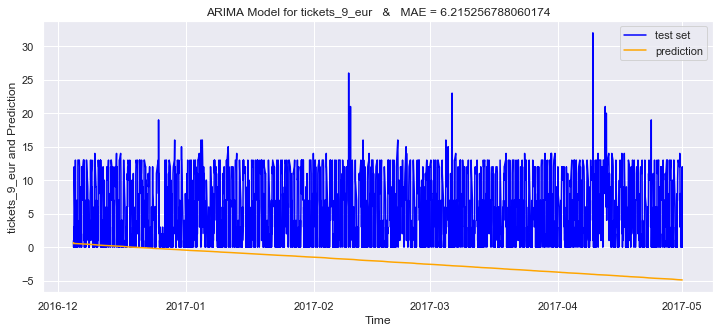

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


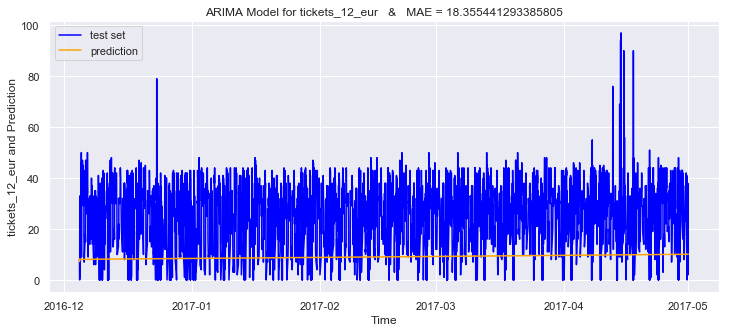

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


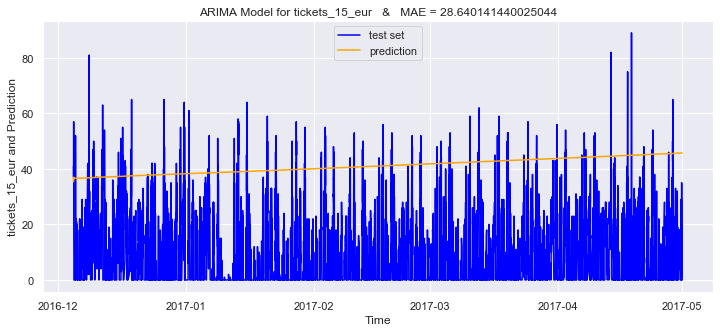

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


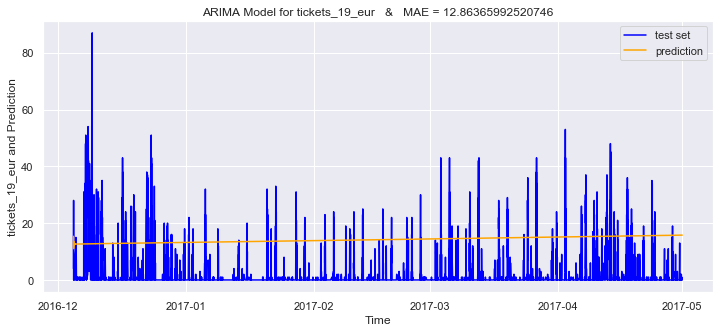

In [54]:
apply_TS('ARIMA', 'tickets_9_eur')
apply_TS('ARIMA', 'tickets_12_eur')
apply_TS('ARIMA', 'tickets_15_eur')
apply_TS('ARIMA', 'tickets_19_eur')

sum_mae = 0
for c in column:
    sum_mae += accuracy_dict['dict_ts']['ARIMA'][c]['mae']
accuracy_dict['dict_ts']['ARIMA']['total_mae'] = (sum_mae/4)

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


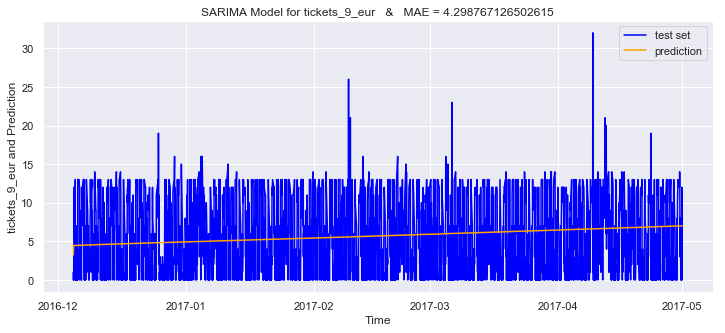

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


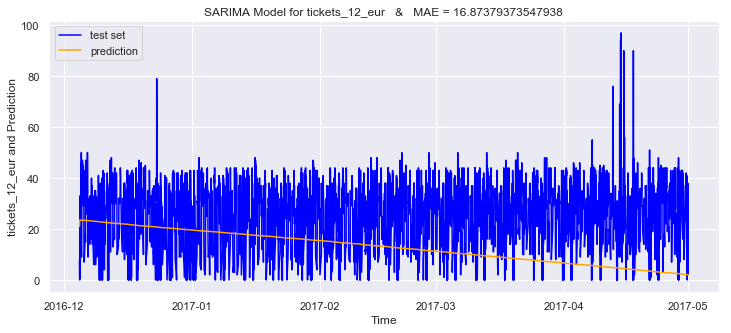

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


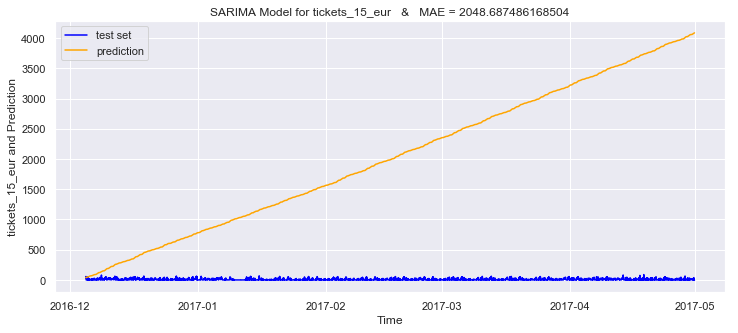

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


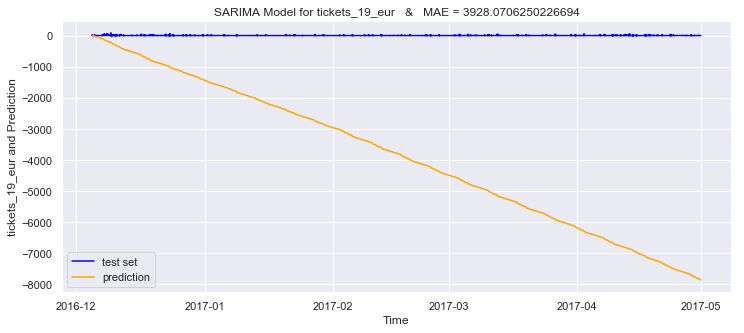

In [55]:
apply_TS('SARIMA', 'tickets_9_eur')
apply_TS('SARIMA', 'tickets_12_eur')
apply_TS('SARIMA', 'tickets_15_eur')
apply_TS('SARIMA', 'tickets_19_eur')

sum_mae = 0
for c in column:
    sum_mae += accuracy_dict['dict_ts']['SARIMA'][c]['mae']
accuracy_dict['dict_ts']['SARIMA']['total_mae'] = (sum_mae/4)

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


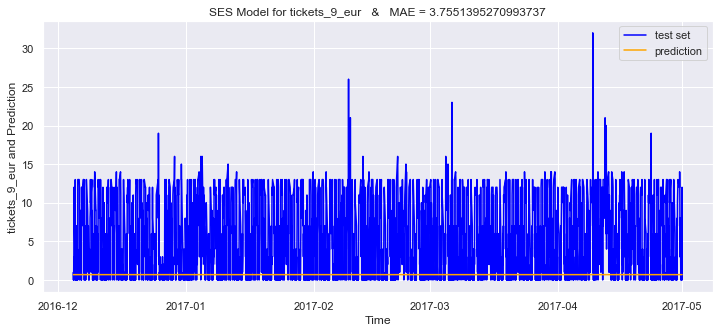

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


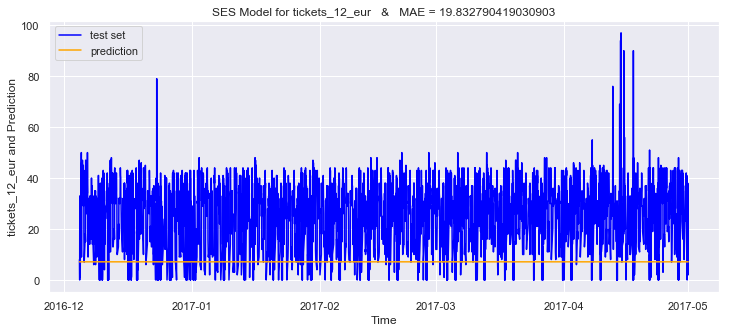

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


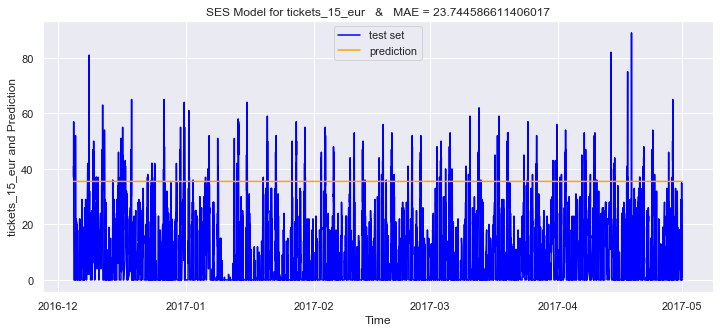

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


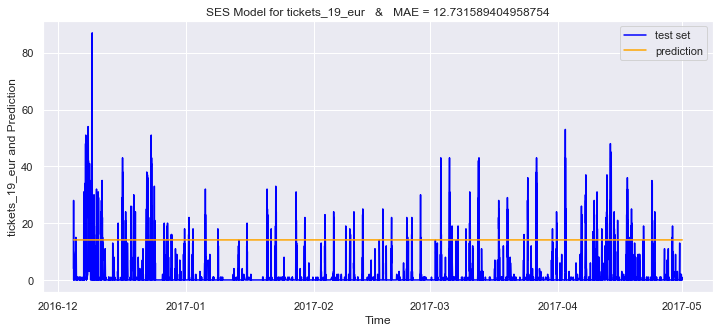

In [56]:
apply_TS('SES', 'tickets_9_eur')
apply_TS('SES', 'tickets_12_eur')
apply_TS('SES', 'tickets_15_eur')
apply_TS('SES', 'tickets_19_eur')

sum_mae = 0
for c in column:
    sum_mae += accuracy_dict['dict_ts']['SES'][c]['mae']
accuracy_dict['dict_ts']['SES']['total_mae'] = (sum_mae/4)

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


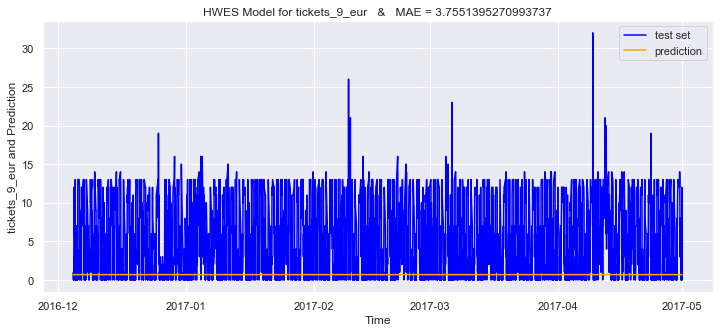

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


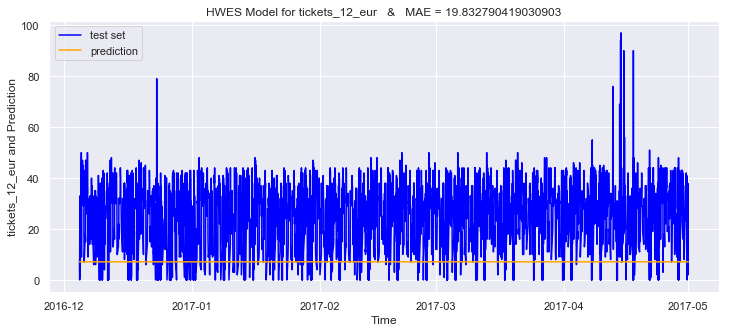

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


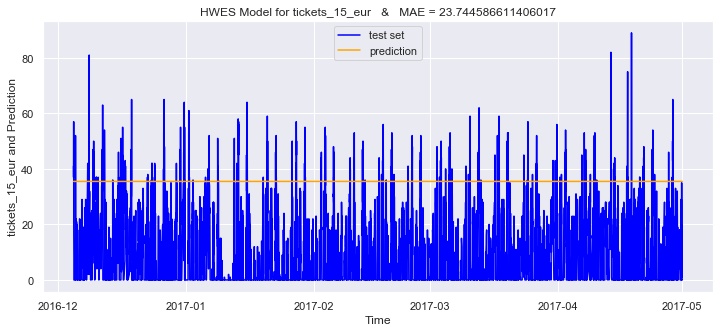

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


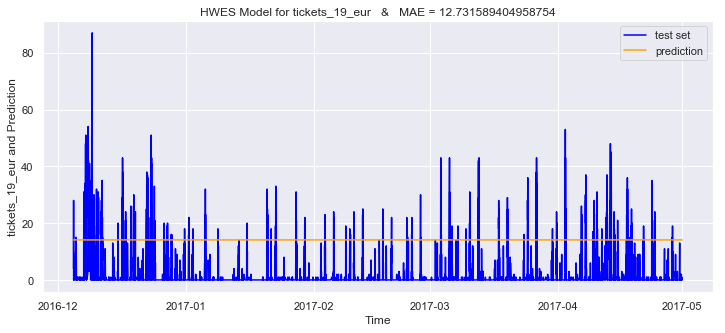

In [57]:
apply_TS('HWES', 'tickets_9_eur')
apply_TS('HWES', 'tickets_12_eur')
apply_TS('HWES', 'tickets_15_eur')
apply_TS('HWES', 'tickets_19_eur')

sum_mae = 0
for c in column:
    sum_mae += accuracy_dict['dict_ts']['HWES'][c]['mae']
accuracy_dict['dict_ts']['HWES']['total_mae'] = (sum_mae/4)

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


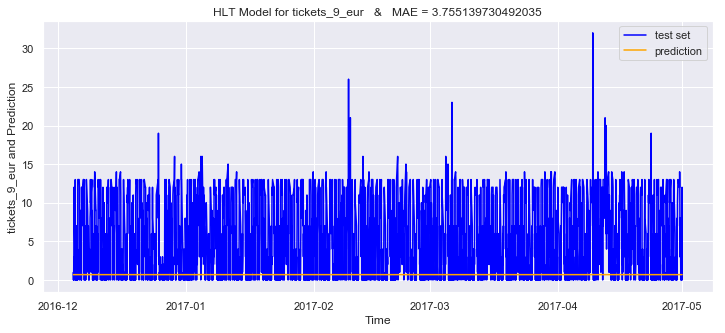

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


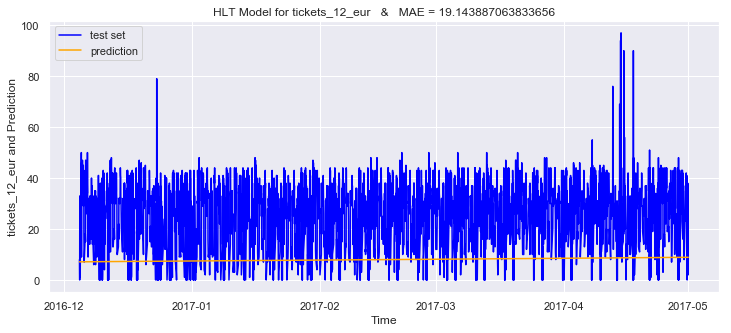

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


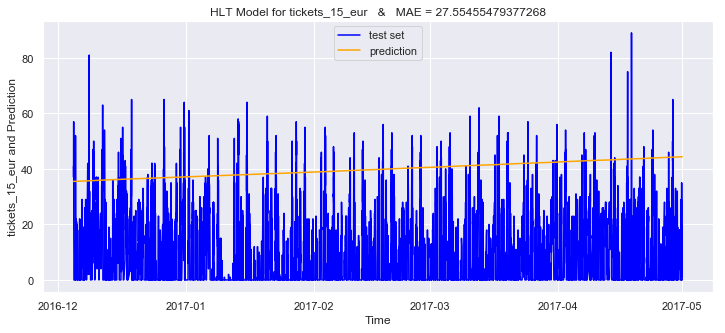

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


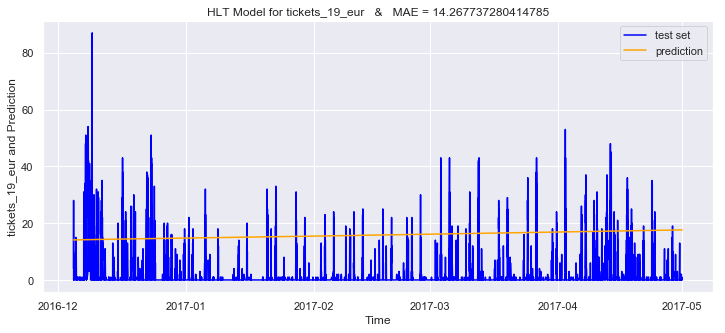

In [58]:
apply_TS('HLT', 'tickets_9_eur')
apply_TS('HLT', 'tickets_12_eur')
apply_TS('HLT', 'tickets_15_eur')
apply_TS('HLT', 'tickets_19_eur')

sum_mae = 0
for c in column:
    sum_mae += accuracy_dict['dict_ts']['HLT'][c]['mae']
accuracy_dict['dict_ts']['HLT']['total_mae'] = (sum_mae/4)

In [59]:
accuracy_dict

{'dict_reg': {'DTR': {'tickets_12_eur': {'mae': 12.105590062111801,
    'mape': inf,
    'r2': -0.5130285106202426},
   'tickets_15_eur': {'mae': 12.29399585921325,
    'mape': inf,
    'r2': -0.4852489756943843},
   'tickets_19_eur': {'mae': 4.807971014492754,
    'mape': inf,
    'r2': -0.7674357510529835},
   'tickets_9_eur': {'mae': 3.385351966873706,
    'mape': inf,
    'r2': -0.26531630843034315},
   'total_mae': 8.148227225672878},
  'LR': {'tickets_12_eur': {'mae': 10.568223745966083,
    'mape': inf,
    'r2': -0.1349417245560809},
   'tickets_15_eur': {'mae': 13.013371048354658,
    'mape': inf,
    'r2': -0.06309234176398992},
   'tickets_19_eur': {'mae': 3.9661797384016726,
    'mape': inf,
    'r2': 0.034440239130374306},
   'tickets_9_eur': {'mae': 8.611243481758029,
    'mape': inf,
    'r2': -3.8968961591451725},
   'total_mae': 9.03975450362011},
  'PR': {'tickets_12_eur': {'mae': 40.82000528437116,
    'mape': inf,
    'r2': -537433.4524945696},
   'tickets_15_eur': 

### 3-Neural Network

###### Recurrent Neural Network (LSTM)

In [60]:
# import library
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [61]:
# create dataset for the rnn
data_model_reg = pd.DataFrame()
data_model_reg = data[['year', 'month', 'week', 'day', 'hour', 'minute', 
                       'holiday', 'direction', 'capacity',
                       'tickets_9_eur', 'tickets_12_eur', 'tickets_15_eur', 'tickets_19_eur']]
data_model_reg.index = data.ride_departure

values = data_model_reg.values
values = values.astype('float64')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

reframed = pd.DataFrame(data=scaled, index=data_model_reg.index, columns=data_model_reg.columns)

# columns = data_model_reg.columns
# reframed = convert_to_supervised(scaled, columns, 1, 1,)
# reframed.index = data.iloc[:len(reframed),:]['ride_departure']

# reframed = reframed.rename(columns = {'tickets_9_eur_t-0':'tickets_9_eur', 
#                                             'tickets_12_eur_t-0':'tickets_12_eur',
#                                             'tickets_15_eur_t-0':'tickets_15_eur',
#                                             'tickets_19_eur_t-0':'tickets_19_eur'})

reframed.head(5)

year  month  week  day      hour    minute  holiday  \
ride_departure                                                             
2015-01-01 08:15:00   0.0    0.0   0.0  0.0  0.347826  0.272727      1.0   
2015-01-01 09:15:00   0.0    0.0   0.0  0.0  0.391304  0.272727      1.0   
2015-01-01 10:15:00   0.0    0.0   0.0  0.0  0.434783  0.272727      1.0   
2015-01-01 11:45:00   0.0    0.0   0.0  0.0  0.478261  0.818182      1.0   
2015-01-01 12:45:00   0.0    0.0   0.0  0.0  0.521739  0.818182      1.0   

                     direction  capacity  tickets_9_eur  tickets_12_eur  \
ride_departure                                                            
2015-01-01 08:15:00        1.0  0.245614       0.265823             0.0   
2015-01-01 09:15:00        0.0  0.245614       0.151899             0.0   
2015-01-01 10:15:00        1.0  0.245614       0.417722             0.0   
2015-01-01 11:45:00        0.0  0.245614       0.316456             0.0   
2015-01-01 12:45:00        1.0  0.245614       0.405063             0.0   

                     tickets_15_eur  tickets_19_eur  
ride_departure                                       
2015-01-01 08:15:00             0.0             0.0  
2015-01-01 09:15:00             0.0             0.0  
2015-01-01 10:15:00             0.0             0.0  
2015-01-01 11:45:00             0.0             0.0  
2015-01-01 12:45:00             0.0             0.0

In [62]:
# train and test set for the lstm
values = reframed.values

lstm_train = values[:int(0.8*(len(reframed))), :] 
lstm_test  = values[int(0.8*(len(reframed))):, :]

data_model_lstm_train = data_model_ts.iloc[:int(0.8*(len(data_model_ts))), :]
data_model_lstm_test = data_model_ts.iloc[int(0.8*(len(data_model_ts))):, :]
train_index = data_model_ts.iloc[:int(0.8*(len(data_model_ts))), :].index
test_index = data_model_ts.iloc[int(0.8*(len(data_model_ts))):, :].index

print('lstm train shape   :', lstm_train.shape)
print('train index shape  :', train_index.shape)
print('lstm test  shape   :', lstm_test.shape)
print('test index shape   :', test_index.shape)

lstm train shape   : (15455, 13)
train index shape  : (15455,)
lstm test  shape   : (3864, 13)
test index shape   : (3864,)


In [63]:
# set inputs and outputs
X_train = lstm_train[:, :-4]
y_train = lstm_train[:, -4:]

X_test = lstm_test[:, :-4]
y_test = lstm_test[:, -4:]

In [64]:
# reshape input as [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print ('X_train shape : ', X_train.shape)
print ('y_train shape : ', y_train.shape)
print ('--------------------------------')
print ('X_test shape  : ', X_test.shape)
print ('y_test shape  : ', y_test.shape)

X_train shape :  (15455, 1, 9)
y_train shape :  (15455, 4)
--------------------------------
X_test shape  :  (3864, 1, 9)
y_test shape  :  (3864, 4)


In [65]:
# invert and calculate error
def invert_mae(X_test, y_test, prediction, loss, model):
    logging.debug('invert_mae start')
    
    list_category = dict()
    list_category_r2 = list()
    list_category_mae = list()
    list_category_rmse = list()
    list_category_mape = list()
    
    # invert scaling for prediction
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))
    inv_prediction = np.concatenate((X_test, prediction), axis=1)
    inv_prediction = scaler.inverse_transform(inv_prediction)
    inv_prediction = inv_prediction[:,-4:]
    
    # invert scaling for actual
    y_test = y_test.reshape(y_test.shape[0], y_test.shape[1])
    inv_y = np.concatenate((X_test, y_test), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-4:]
    
    for i in range(0,4,1):
        list_category_r2.append(r2_score(inv_y[:,i], inv_prediction[:,i]))
        list_category_mae.append(mean_absolute_error(inv_y[:,i], inv_prediction[:,i]))
        list_category_rmse.append(np.sqrt(mean_squared_error(inv_y[:,i], inv_prediction[:,i])))
        #list_category_mape.append(calc_mape(y_test=inv_y[:,i], prediction=inv_prediction[:,i]))
        
    list_category.update({'r2':list_category_r2, 'mae':list_category_mae, 
                          'rmse':list_category_rmse, 'mape':list_category_mape, 
                          'loss':loss, 'model':model, 
                          'inv_y':inv_y, 'inv_prediction':inv_prediction})
    
    logging.debug('invert_mae finish')
    return list_category

In [66]:
# best parameter selection
def best_parameters(X_train, y_train, X_test, y_test, repeats, n_batch, n_epoch, n_neuron, name):
    error_scores = dict()
    logging.debug('***********************************************************************************')
    logging.debug(n_epoch)
    logging.debug('best parameter start')

    for i in range(repeats):
        logging.debug(i)
        logging.debug('repeats start')
        
        # model fitting
        model = Sequential()
        model.add(LSTM(n_neuron, batch_input_shape=(n_batch, X_train.shape[1], X_train.shape[2]), stateful=True))
        model.add(Dense(4))
        model.compile(loss='mean_absolute_error', optimizer='adam')
        history = model.fit(X_train, y_train, epochs=n_epoch, batch_size=n_batch, validation_data=(X_test, y_test), 
                            verbose=0, shuffle=False)
        model.reset_states()

         # make a prediction
        prediction = model.predict(X_test, batch_size=n_batch)

        # add error list
        inv_err = invert_mae(X_test, y_test, prediction, history, model)
                
        if name not in error_scores:
            error_scores[name] = {}
        
        if i not in error_scores[name]:
            error_scores[name][i] = {}

        error_scores[name][i] = inv_err
        
        logging.debug('repeats finish')
        logging.debug('***********************************************************************************')
        
    return error_scores

In [67]:
# select best number of epoch

# you can select 2, 3, 4, 10 or 30.. for best fitting but i have performance problem because of my pc :(
repeats  = 1

# you can select 256, 512 or 1024.. for best fitting but i have performance problem because of my pc :(
n_epoch  = [2, 4, 8, 16, 32] # 64, 128, 256, 512, 1024] 

# n_neuron = int(2/3 * (reframed.shape[1]))     ( 8 or 178 )
n_neuron = 1

# n_batch = 2, 3, 4, 10 if your machine is powerful, you can try
n_batch  = 1

name = 'epoch'

epoch_list = dict()

for e in n_epoch:
    epoch_list[e] = best_parameters(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, 
                                  repeats=repeats, n_batch=n_batch, n_epoch=e, n_neuron=n_neuron, name=name)

In [68]:
epoch_list

{2: {'epoch': {0: {'inv_prediction': array([[ 2.2221195 , 28.78487813, 18.47859675,  1.98158851],
           [ 2.43859417, 28.19708873, 18.18632063,  1.98214774],
           [ 2.58832502, 27.79052834, 17.9841599 ,  1.98253455],
           ...,
           [ 7.99245911, 13.11678611, 10.68768775,  1.99649501],
           [ 9.52064174,  8.96734081,  8.62438969,  2.00044288],
           [ 9.07684929, 10.17236327,  9.22358266,  1.99929637]]),
    'inv_y': array([[ 0.,  8., 41.,  4.],
           [ 1.,  3., 37., 28.],
           [ 0.,  0., 57.,  0.],
           ...,
           [ 3., 14.,  0.,  0.],
           [12.,  2.,  0.,  0.],
           [ 0., 32.,  0.,  0.]]),
    'loss': <tensorflow.python.keras.callbacks.History at 0x2475d467f98>,
    'mae': [3.838025119604917,
     10.78672552921117,
     12.751028589586154,
     4.010833194940187],
    'mape': [],
    'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x247671745f8>,
    'r2': [-0.12579161199874345,
     -0.036399591113

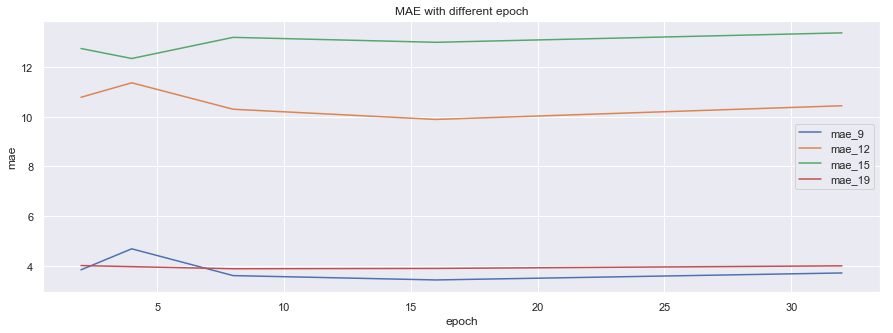

In [69]:
# analysis with mae
pd_mae = pd.DataFrame(index=n_epoch, columns=['mae_9', 'mae_12', 'mae_15', 'mae_19'])

for e in n_epoch:
    mae_list_9 = list()
    mae_list_12 = list()
    mae_list_15 = list()
    mae_list_19 = list()
    
    for i in range(0,repeats,1):
        mae_list_9.append(epoch_list[e][name][i]['mae'][0])
        mae_list_12.append(epoch_list[e][name][i]['mae'][1])
        mae_list_15.append(epoch_list[e][name][i]['mae'][2])
        mae_list_19.append(epoch_list[e][name][i]['mae'][3])
    
    pd_mae.loc[e] = [np.mean(mae_list_9), np.mean(mae_list_12), np.mean(mae_list_15), np.mean(mae_list_19)]

pd_mae

# plot for mae
_=plt.figure(figsize=(15,5))
_=plt.plot(pd_mae.index.values, pd_mae.mae_9.values, label='mae_9')
_=plt.plot(pd_mae.index.values, pd_mae.mae_12.values, label='mae_12')
_=plt.plot(pd_mae.index.values, pd_mae.mae_15.values, label='mae_15')
_=plt.plot(pd_mae.index.values, pd_mae.mae_19.values, label='mae_19')
_=plt.title('MAE with different epoch')
_=plt.xlabel('epoch')
_=plt.ylabel('mae')
_=plt.legend(loc='best')
plt.show();

- 32 is the best

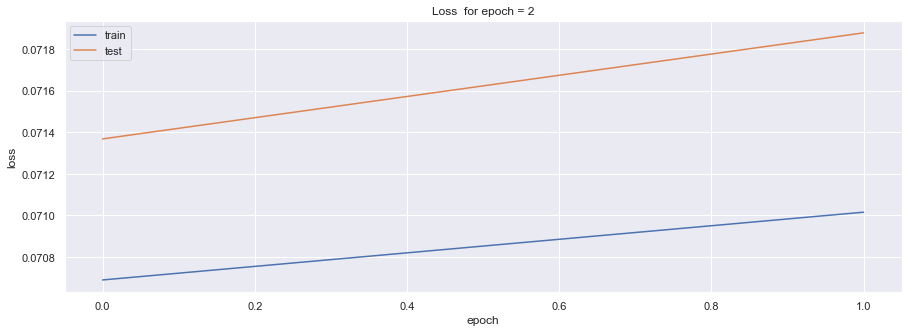

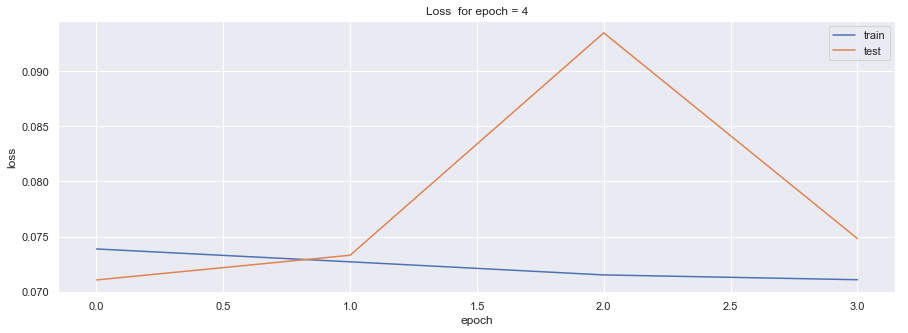

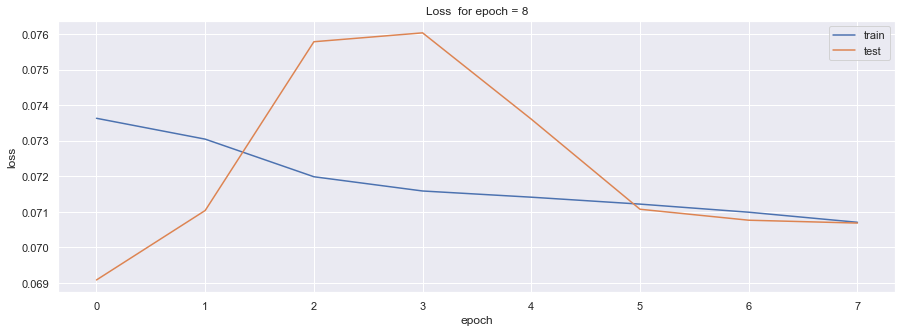

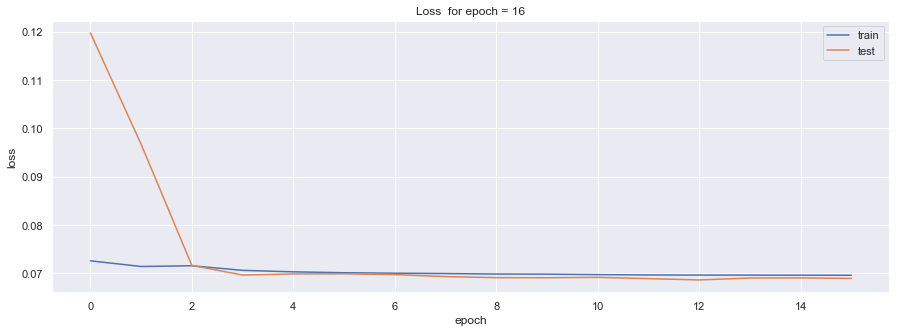

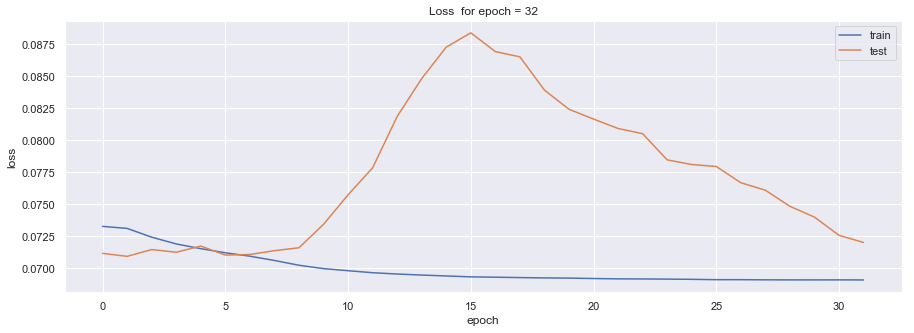

In [70]:
#analysis with loss
for e in n_epoch:
    loss = list()
    val_loss = list()

    for i in range(0,repeats,1):
        loss.append(epoch_list[e][name][i]['loss'].history['loss'])
        val_loss.append(epoch_list[e][name][i]['loss'].history['val_loss'])

    # plot for loss
    _=plt.figure(figsize=(15,5))
    _=plt.plot(range(0,e,1), loss[0], label='train')
    _=plt.plot(range(0,e,1), val_loss[0], label='test')
    _=plt.title('Loss ' + ' for epoch = ' + str(e))
    _=plt.xlabel('epoch')
    _=plt.ylabel('loss')
    _=plt.legend(loc='best')
    plt.show();

- 32 is the best

- i will pass this step because of my performance problem and i will continue neuron=1
- normally i want to try with different neuron

In [71]:
# # select best number of neuron with best epoch
# repeats  = 1
# n_neuron = [1, 2, 3, 4]
# n_batch  = 1
# n_epoch  = 32
# name = 'neuron'
# neuron_list = dict()

# for e in n_neuron:
#     neuron_list[e] = best_parameters(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, 
#                                     repeats=repeats, n_batch=n_batch, n_epoch=e, n_neuron=n_neuron, name=name)

- i will pass this step because of my performance problem and i will continue batch=1
- normally i want to try with different batch

In [72]:
# # select best number of batch with best epoch
# repeats  = 10
# n_neuron = 1
# n_batch  = [1, 2, 3, 4]
# n_epoch  = 32
# name = 'batch'
# batch_list = dict()

# for e in n_neuron:
#     neuron_list[e] = best_parameters(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, 
#                                     repeats=repeats, n_batch=n_batch, n_epoch=e, n_neuron=n_neuron, name=name)

In [73]:
def plot_LSTM(X_train, train_index, y_test, test_index, prediction, column, title, index):
    if 'dict_rnn' not in accuracy_dict:
        accuracy_dict['dict_rnn'] = {}
    
    if title not in accuracy_dict['dict_rnn']:
        accuracy_dict['dict_rnn'][title] = {}
    
    if column not in accuracy_dict['dict_rnn'][title]:
        accuracy_dict['dict_rnn'][title][column] = {}
    
    if 'mae' not in accuracy_dict['dict_rnn'][title][column]:
        accuracy_dict['dict_rnn'][title][column]['mae'] = {}

    if 'mape' not in accuracy_dict['dict_rnn'][title][column]:
        accuracy_dict['dict_rnn'][title][column]['mape'] = {}

    mae = mean_absolute_error(y_test, prediction)
    mape = calc_mape(y_test, prediction)
    
    accuracy_dict['dict_rnn'][title][column]['mae']  = mae
    accuracy_dict['dict_rnn'][title][column]['mape'] = mape
    
    _=plt.figure(figsize=(15,5))
    #_=plt.plot(train_index, X_train, label='train set')
    _=plt.plot(test_index, y_test, label='test')
    _=plt.plot(test_index, prediction, label='predict')
    _=plt.xlabel('Time')
    _=plt.ylabel('Test and Predict')
    _=plt.title(title + ' for ' + column + '   &  MAE ' + str(mae))
    _=plt.legend(loc='best')
    plt.show();

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


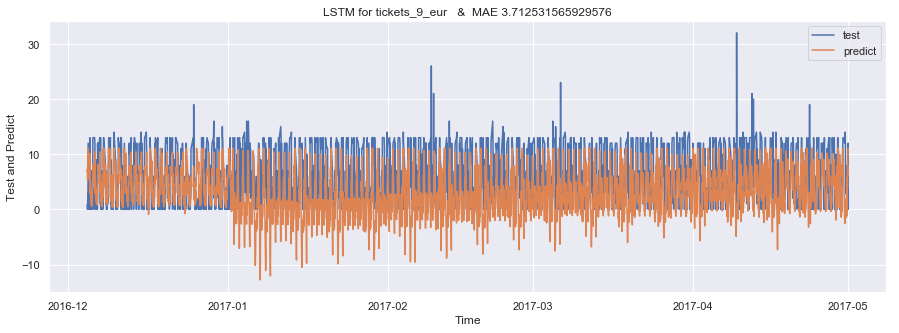

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


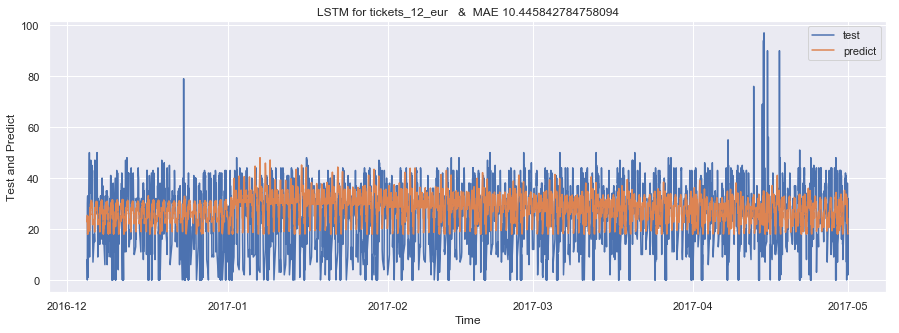

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


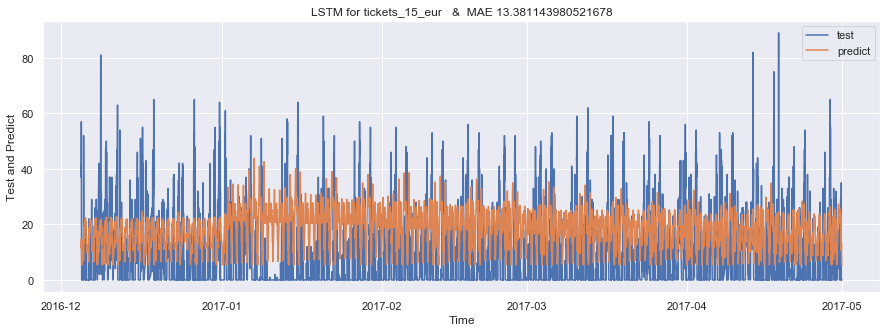

C:\Users\MAHMUTCO\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


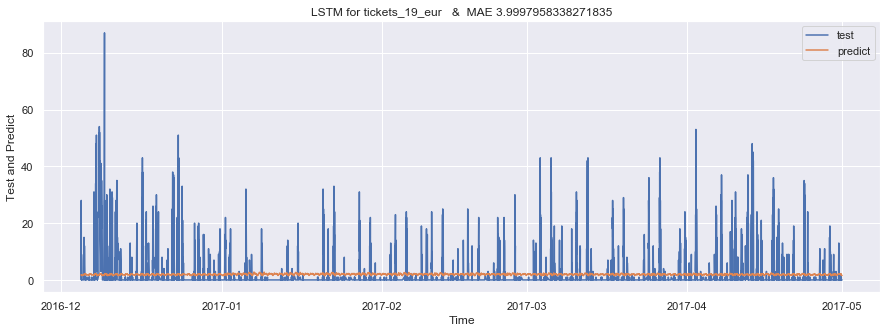

In [74]:
# get the best model and apply (epoch=16)
plot_LSTM(data_model_lstm_train['tickets_9_eur'].values,  train_index, epoch_list[32]['epoch'][0]['inv_y'][:,0], test_index.values[0:], epoch_list[32]['epoch'][0]['inv_prediction'][:,0], 'tickets_9_eur',  'LSTM', 0)
plot_LSTM(data_model_lstm_train['tickets_12_eur'].values, train_index, epoch_list[32]['epoch'][0]['inv_y'][:,1], test_index.values[0:], epoch_list[32]['epoch'][0]['inv_prediction'][:,1], 'tickets_12_eur', 'LSTM', 1)
plot_LSTM(data_model_lstm_train['tickets_15_eur'].values, train_index, epoch_list[32]['epoch'][0]['inv_y'][:,2], test_index.values[0:], epoch_list[32]['epoch'][0]['inv_prediction'][:,2], 'tickets_15_eur', 'LSTM', 2)
plot_LSTM(data_model_lstm_train['tickets_19_eur'].values, train_index, epoch_list[32]['epoch'][0]['inv_y'][:,3], test_index.values[0:], epoch_list[32]['epoch'][0]['inv_prediction'][:,3], 'tickets_19_eur', 'LSTM', 3)

# add to accuracy dict
sum_mae = 0
for i in column:
    sum_mae += accuracy_dict['dict_rnn']['LSTM'][i]['mae']

if 'total_mae' not in accuracy_dict['dict_rnn']['LSTM']:
    accuracy_dict['dict_rnn']['LSTM']['total_mae'] = {}

accuracy_dict['dict_rnn']['LSTM']['total_mae'] = (sum_mae/4)

In [75]:
accuracy_dict

{'dict_reg': {'DTR': {'tickets_12_eur': {'mae': 12.105590062111801,
    'mape': inf,
    'r2': -0.5130285106202426},
   'tickets_15_eur': {'mae': 12.29399585921325,
    'mape': inf,
    'r2': -0.4852489756943843},
   'tickets_19_eur': {'mae': 4.807971014492754,
    'mape': inf,
    'r2': -0.7674357510529835},
   'tickets_9_eur': {'mae': 3.385351966873706,
    'mape': inf,
    'r2': -0.26531630843034315},
   'total_mae': 8.148227225672878},
  'LR': {'tickets_12_eur': {'mae': 10.568223745966083,
    'mape': inf,
    'r2': -0.1349417245560809},
   'tickets_15_eur': {'mae': 13.013371048354658,
    'mape': inf,
    'r2': -0.06309234176398992},
   'tickets_19_eur': {'mae': 3.9661797384016726,
    'mape': inf,
    'r2': 0.034440239130374306},
   'tickets_9_eur': {'mae': 8.611243481758029,
    'mape': inf,
    'r2': -3.8968961591451725},
   'total_mae': 9.03975450362011},
  'PR': {'tickets_12_eur': {'mae': 40.82000528437116,
    'mape': inf,
    'r2': -537433.4524945696},
   'tickets_15_eur': 

In [76]:
# compare algorithms
scores = list()
index = list()
div = ['dict_reg', 'dict_rnn', 'dict_ts']

for j in div:
    for i in accuracy_dict[j]:
        scores.append(accuracy_dict[j][i]['total_mae'])
        index.append(str(i))

compare_alg = pd.DataFrame(data=scores, index=index, columns=['scores'])

compare_alg.sort_values(ascending=True, by='scores')

scores
RFR        7.126540
LSTM       7.884829
DTR        8.148227
AR         8.612258
ARMA       8.767327
MA         8.771747
SVR        9.033883
LR         9.039755
SES       15.016026
HWES      15.016026
HLT       16.180330
ARIMA     16.518625
PR        20.363266
SARIMA  1499.482668

 ** BEST RESULT : RandomForestRegression **

## 1.4 IMPROVE RESULTS

In [77]:
# again train and test data for random forest
column = ['tickets_9_eur', 'tickets_12_eur', 'tickets_15_eur', 'tickets_19_eur']
data_model_reg_train = data_model_reg[:int(0.8*(len(data_model_reg)))]
data_model_reg_test = data_model_reg[int(0.8*(len(data_model_reg))):]

X_train = data_model_reg_train.drop(columns=column)
y_train = data_model_reg_train[column]
X_test = data_model_reg_test.drop(columns=column)
y_test = data_model_reg_test[column]

print('reg train shape :', data_model_reg_train.shape)
print('reg test shape  :', data_model_reg_test.shape)

X_train.head(2)
y_train.head(2)
X_test.head(2)
y_test.head(2)

reg train shape : (15455, 13)
reg test shape  : (3864, 13)


year  month  week  day  hour  minute  holiday  direction  \
ride_departure                                                                  
2015-01-01 08:15:00  2015      1     1    1     8      15        1          1   
2015-01-01 09:15:00  2015      1     1    1     9      15        1          0   

                     capacity  
ride_departure                 
2015-01-01 08:15:00      82.0  
2015-01-01 09:15:00      82.0

tickets_9_eur  tickets_12_eur  tickets_15_eur  \
ride_departure                                                       
2015-01-01 08:15:00           21.0             0.0             0.0   
2015-01-01 09:15:00           12.0             0.0             0.0   

                     tickets_19_eur  
ride_departure                       
2015-01-01 08:15:00             0.0  
2015-01-01 09:15:00             0.0

year  month  week  day  hour  minute  holiday  direction  \
ride_departure                                                                  
2016-12-04 19:45:00  2016     12    48    4    19      45        0          0   
2016-12-04 20:15:00  2016     12    48    4    20      15        0          1   

                     capacity  
ride_departure                 
2016-12-04 19:45:00      82.0  
2016-12-04 20:15:00      82.0

tickets_9_eur  tickets_12_eur  tickets_15_eur  \
ride_departure                                                       
2016-12-04 19:45:00            0.0             8.0            41.0   
2016-12-04 20:15:00            1.0             3.0            37.0   

                     tickets_19_eur  
ride_departure                       
2016-12-04 19:45:00             4.0  
2016-12-04 20:15:00            28.0

In [78]:
# improve model
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 8)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(100, 200, num = 8)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_param = {'estimator__n_estimators': n_estimators,
                'estimator__max_features': max_features,
                'estimator__max_depth': max_depth,
                'estimator__min_samples_split': min_samples_split,
                'estimator__min_samples_leaf': min_samples_leaf,
                'estimator__bootstrap': bootstrap}

pprint (random_param)

{'estimator__bootstrap': [True, False],
 'estimator__max_depth': [100, 114, 128, 142, 157, 171, 185, 200, None],
 'estimator__max_features': ['auto', 'sqrt'],
 'estimator__min_samples_leaf': [1, 2, 4],
 'estimator__min_samples_split': [2, 5, 10],
 'estimator__n_estimators': [100, 114, 128, 142, 157, 171, 185, 200]}


In [79]:
# Use the random search for best hyperparameters
# First create the base model to tune
regressor = MultiOutputRegressor(RandomForestRegressor())

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
regressor_random = RandomizedSearchCV(estimator=regressor, param_distributions=random_param, n_iter=100, cv=3, 
                                      verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
regressor_random.fit(X_train, y_train)

# best parameters
#test_index = X_test.index.values
#plot_Regression(y_test, prediction, test_index, column, 'Random Forest Regression', 'RFR')

rand_best_param = regressor_random.best_params_

best_random_model = regressor_random.best_estimator_
prediction_random = best_random_model.predict(X_test)

print ('******************************************************')
print ('best parameters   : ', rand_best_param)
print ('First Model MAE   : ', accuracy_dict['dict_reg']['RFR']['total_mae'])
print ('Random MAE        : ', mean_absolute_error(prediction_random, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
           n_jobs=None),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'estimator__n_estimators': [100, 114, 128, 142, 157, 171, 185, 200], 'estimator__max_features': ['auto', 'sqrt'], 'estimator__max_depth': [100, 114, 128, 142, 157, 171, 185, 200, None], 'estimator__min_samples_split': [2, 5, 10], 'estimator__min_samples_leaf': [1, 2, 4], 'estimator__bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
      

******************************************************
best parameters   :  {'estimator__n_estimators': 185, 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 4, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 128, 'estimator__bootstrap': False}
First Model MAE   :  7.126539855072464
Random MAE        :  6.496167532209872


In [80]:
# improve model using previous result
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [100,110,120,130]

# Number of features to consider at every split
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [140,150,160,170]

# Minimum number of samples required to split a node
min_samples_split = [4,5,6]

# Minimum number of samples required at each leaf node
min_samples_leaf = [3,4,5]

# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
grid_param = {'estimator__n_estimators': n_estimators,
              'estimator__max_features': max_features,
              'estimator__max_depth': max_depth,
              'estimator__min_samples_split': min_samples_split,
              'estimator__min_samples_leaf': min_samples_leaf,
              'estimator__bootstrap': bootstrap}

pprint (grid_param)

{'estimator__bootstrap': [True],
 'estimator__max_depth': [140, 150, 160, 170],
 'estimator__max_features': ['sqrt'],
 'estimator__min_samples_leaf': [3, 4, 5],
 'estimator__min_samples_split': [4, 5, 6],
 'estimator__n_estimators': [100, 110, 120, 130]}


In [81]:
# Use the gird search for best hyperparameters
# First create the base model to tune
regressor = MultiOutputRegressor(RandomForestRegressor())

# Instantiate the grid search model
regressor_grid = GridSearchCV(estimator=regressor, param_grid=grid_param, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
regressor_grid.fit(X_train, y_train)

# best parameters
test_index = X_test.index.values

grid_best_param = regressor_grid.best_params_

best_grid_model = regressor_grid.best_estimator_
prediction_grid = best_grid_model.predict(X_test)

print ('******************************************************')
print ('best parameters   : ', grid_best_param)
print ('First Model MAE   : ', accuracy_dict['dict_reg']['RFR']['total_mae'])
print ('Random MAE        : ', mean_absolute_error(prediction_grid, y_test))

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  4.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
           n_jobs=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'estimator__n_estimators': [100, 110, 120, 130], 'estimator__max_features': ['sqrt'], 'estimator__max_depth': [140, 150, 160, 170], 'estimator__min_samples_split': [4, 5, 6], 'estimator__min_samples_leaf': [3, 4, 5], 'estimator__bootstrap': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

******************************************************
best parameters   :  {'estimator__bootstrap': True, 'estimator__max_depth': 160, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 5, 'estimator__min_samples_split': 6, 'estimator__n_estimators': 110}
First Model MAE   :  7.126539855072464
Random MAE        :  6.527705714929939


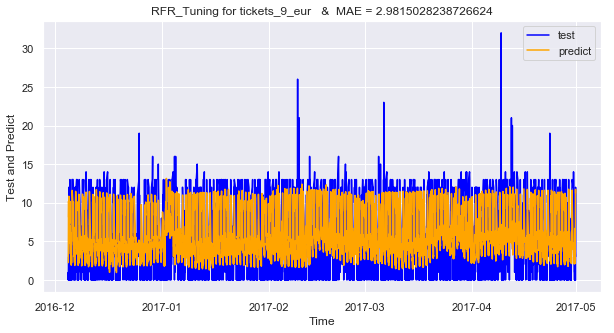

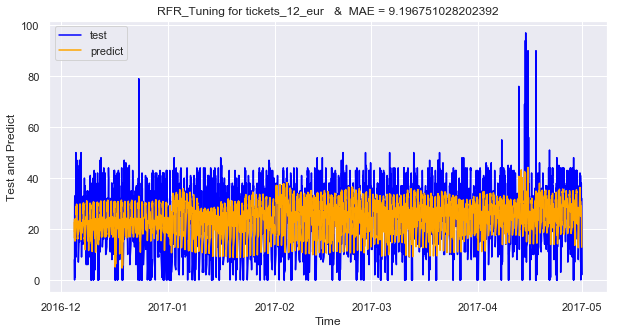

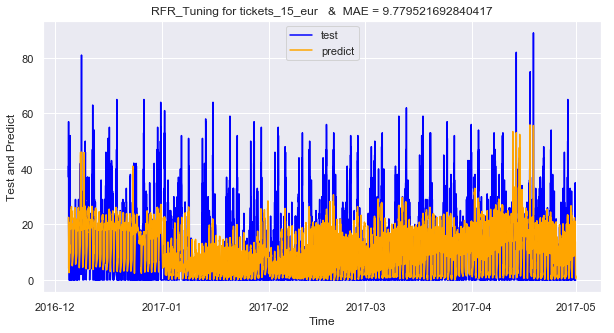

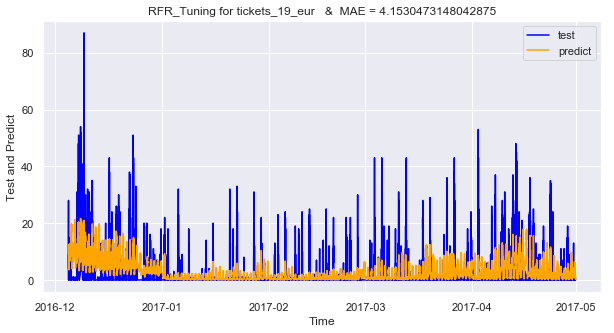

In [82]:
# plot for GridSearchCV
plot_Regression(y_test, prediction_grid, test_index, column, 'RFR_Tuning', 'RFR_Tuning')

In [83]:
compare_alg.loc['RFR_Tuning'] = mean_absolute_error(prediction_grid, y_test)

compare_alg.sort_values(ascending=True, by='scores')

scores
RFR_Tuning     6.527706
RFR            7.126540
LSTM           7.884829
DTR            8.148227
AR             8.612258
ARMA           8.767327
MA             8.771747
SVR            9.033883
LR             9.039755
SES           15.016026
HWES          15.016026
HLT           16.180330
ARIMA         16.518625
PR            20.363266
SARIMA      1499.482668

SAVE MODEL
- model.save('regressor_grid.h5')
- from keras.models import load_model
- model = load_model('regressor_grid.h5')
- prediction = model.predict(X_test, verbose=0)
- print(prediction)

## 1.5 PRESENT RESULTS

In [84]:
# Get data
file = 'test_data.csv'
data = pd.read_csv(file)
# data = pd.read_csv(file, index_col=0)

data.head(5)
data.shape

index       ride_departure  capacity direction
0  19219  2017-05-01 07:00:00        75      B->A
1  19220  2017-05-01 08:30:00        75      A->B
2  19221  2017-05-01 09:00:00        75      B->A
3  19222  2017-05-01 10:00:00        75      B->A
4  19223  2017-05-01 10:30:00        75      A->B

(1735, 4)

In [85]:
# Data types and size
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 4 columns):
index             1735 non-null int64
ride_departure    1735 non-null object
capacity          1735 non-null int64
direction         1735 non-null object
dtypes: int64(2), object(2)
memory usage: 54.3+ KB


In [86]:
# split the timestamp
data.ride_departure = pd.to_datetime(data.ride_departure)
data['year'] = data.ride_departure.dt.year
data['month'] = data.ride_departure.dt.month
data['week'] = data.ride_departure.dt.week
data['day'] = data.ride_departure.dt.day
data['hour'] = data.ride_departure.dt.hour
data['minute'] = data.ride_departure.dt.minute

data.head(5)

index      ride_departure  capacity direction  year  month  week  day  \
0  19219 2017-05-01 07:00:00        75      B->A  2017      5    18    1   
1  19220 2017-05-01 08:30:00        75      A->B  2017      5    18    1   
2  19221 2017-05-01 09:00:00        75      B->A  2017      5    18    1   
3  19222 2017-05-01 10:00:00        75      B->A  2017      5    18    1   
4  19223 2017-05-01 10:30:00        75      A->B  2017      5    18    1   

   hour  minute  
0     7       0  
1     8      30  
2     9       0  
3    10       0  
4    10      30

In [87]:
# direction encoder
# convert to direction value as numeric value like 1 or 0
# 1: from A to B
# 0: from B to A

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
encoder = LabelEncoder()
data.loc[:, 'direction'] = encoder.fit_transform(data.loc[:,'direction'])

# ==> second option, but you have to be sure that there are two direction just
# data.direction = np.where(data.direction == 'A->B', 1, 0)

data.head(5)

index      ride_departure  capacity  direction  year  month  week  day  \
0  19219 2017-05-01 07:00:00        75          1  2017      5    18    1   
1  19220 2017-05-01 08:30:00        75          0  2017      5    18    1   
2  19221 2017-05-01 09:00:00        75          1  2017      5    18    1   
3  19222 2017-05-01 10:00:00        75          1  2017      5    18    1   
4  19223 2017-05-01 10:30:00        75          0  2017      5    18    1   

   hour  minute  
0     7       0  
1     8      30  
2     9       0  
3    10       0  
4    10      30

In [88]:
# add holiday column
import holidays

# de_holidays = holidays.Germany()
de_holidays = holidays.DE(state='BY')

data["holiday"] = np.where(data.apply(lambda x: x.ride_departure in de_holidays, axis=1) == True, 1, 0)

data[(data.holiday == 1)].head(5)

index      ride_departure  capacity  direction  year  month  week  day  \
0  19219 2017-05-01 07:00:00        75          1  2017      5    18    1   
1  19220 2017-05-01 08:30:00        75          0  2017      5    18    1   
2  19221 2017-05-01 09:00:00        75          1  2017      5    18    1   
3  19222 2017-05-01 10:00:00        75          1  2017      5    18    1   
4  19223 2017-05-01 10:30:00        75          0  2017      5    18    1   

   hour  minute  holiday  
0     7       0        1  
1     8      30        1  
2     9       0        1  
3    10       0        1  
4    10      30        1

In [89]:
# save index and ride_departure
index_values = data['index']
ride_departure = data['ride_departure']

data = data.drop(columns=['index', 'ride_departure'])
data.head(5)

capacity  direction  year  month  week  day  hour  minute  holiday
0        75          1  2017      5    18    1     7       0        1
1        75          0  2017      5    18    1     8      30        1
2        75          1  2017      5    18    1     9       0        1
3        75          1  2017      5    18    1    10       0        1
4        75          0  2017      5    18    1    10      30        1

In [90]:
# set the format
result = best_grid_model.predict(data)

pd_result = pd.DataFrame(data=result, index=index_values, columns=column)

pd_result.head(5)

tickets_9_eur  tickets_12_eur  tickets_15_eur  tickets_19_eur
index                                                               
19219      19.589180       14.775056        6.184538        4.605855
19220      20.427236       15.611183        6.354793        3.729306
19221      19.589180       14.775056        6.184538        4.605855
19222      19.589180       14.775056        6.184538        4.605855
19223      20.427236       15.611183        6.354793        3.729306

In [91]:
# write to file
pd_result.to_csv('prediction.csv', encoding='utf-8')